In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
 #Importing dataset of Lending club 
path = '/content/drive/MyDrive/Colab Notebooks/lending_club_loan_two.csv'
#path = '/content/drive/MyDrive/lending_club_loan_two.csv'
data = pd.read_csv(path)


## **EXPLORATORY DATA ANALYSIS**

In [4]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
data.shape

(396030, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
#checking null valuees
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
# Identify percentage of null values
null_percent = (data.isnull().sum()/data.shape[0])*100
null_data_percent = null_percent[null_percent>0]
null_data_percent = pd.DataFrame(null_data_percent,columns=['Percentage of null values'])
null_data_percent.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
mort_acc,9.543469
emp_title,5.789208
emp_length,4.621115
title,0.443148
pub_rec_bankruptcies,0.135091
revol_util,0.069692


In [10]:
# Drop null values
data.dropna(inplace=True)

In [11]:
data.shape

(335868, 27)

Typecasting

In [12]:
data['issue_d'] = pd.to_datetime(data['issue_d']).dt.date
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line']).dt.year
data['term']=data.term.str.replace(' months','').astype(int)
data['emp_length']=data['emp_length'].replace(['10+ years','< 1 year'],['11 years','0 years'])


In [13]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [14]:
data['emp_length']=data['emp_length'].apply(emp_length_to_int)

**1. Univariate Analysis**

In [15]:
data['loan_status'].value_counts()

Fully Paid     269556
Charged Off     66312
Name: loan_status, dtype: int64

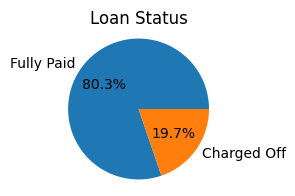

In [16]:
loan_type_count = data['loan_status'].value_counts()
status_array = data['loan_status'].unique()
plt.figure(figsize =(2,2))
plt.pie(loan_type_count, labels=status_array, autopct='%1.1f%%')
plt.title('Loan Status')
plt.axis('equal')
plt.show()

Observation: Only 19.7% belongs to class 'Charged Off, where as 'Fully Paid' is 80.3%. So ratio of minority: majority class = 1:4 here. This difference in target column makes the data unbalanced.

In [17]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

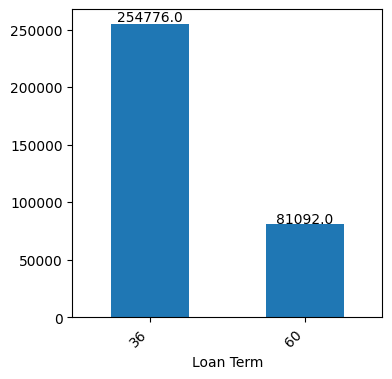

In [18]:
plt.figure(figsize=(4,4))
plot = data['term'].value_counts().plot(kind='bar')
plt.xlabel('Loan Term')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Observation: Most of the customers made 36 number of payments (36 months), a few people made 60 payments

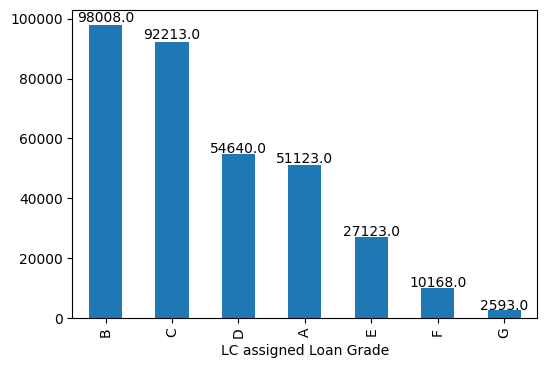

In [19]:
plt.figure(figsize=(6,4))
plot = data['grade'].value_counts().plot(kind='bar')
plt.xlabel('LC assigned Loan Grade')
show_values(plot)

Observation: Most of the records showed borrowers with B grade. Least borrowers had G grade

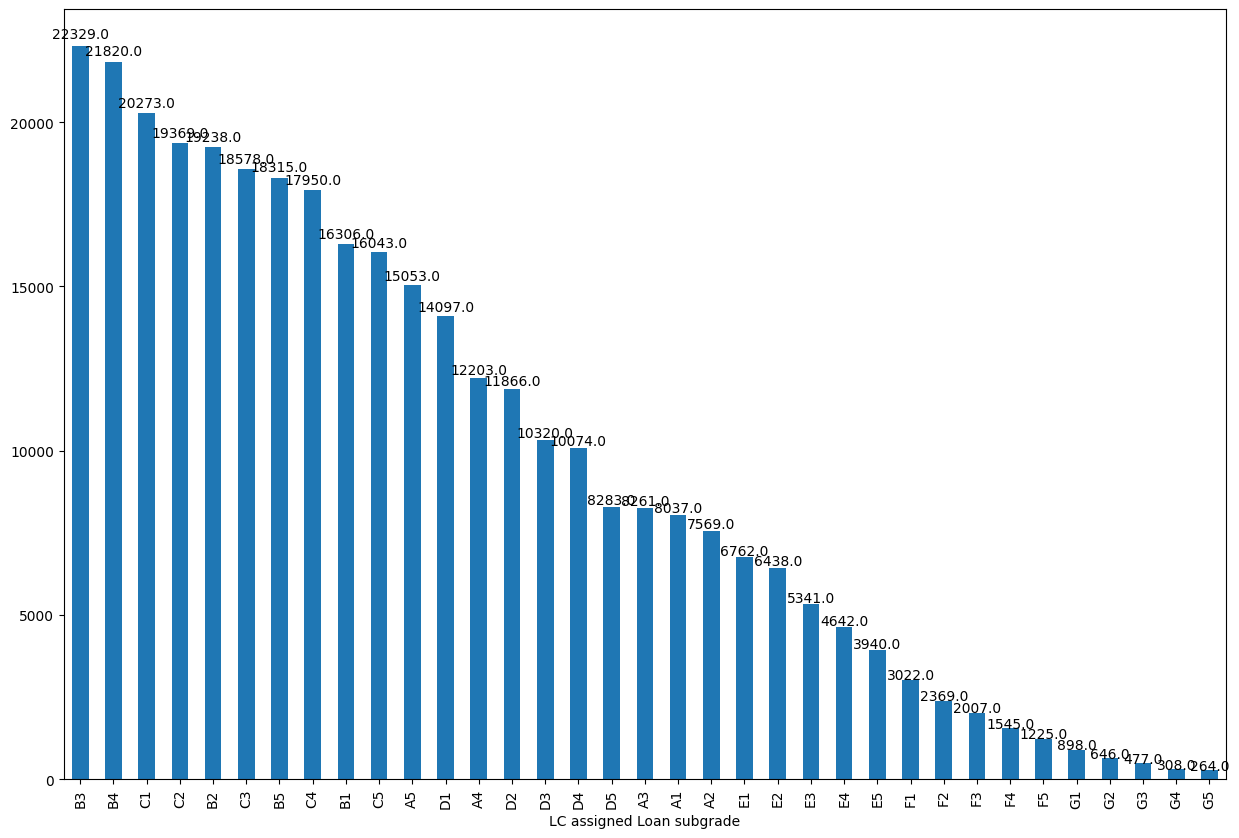

In [20]:
plt.figure(figsize=(15,10))
plot = data['sub_grade'].value_counts().plot(kind='bar')
plt.xlabel('LC assigned Loan subgrade')
show_values(plot)

Observation: Most of the records showed borrowers with B3 subgrade. Least borrowers had G5 subgrade

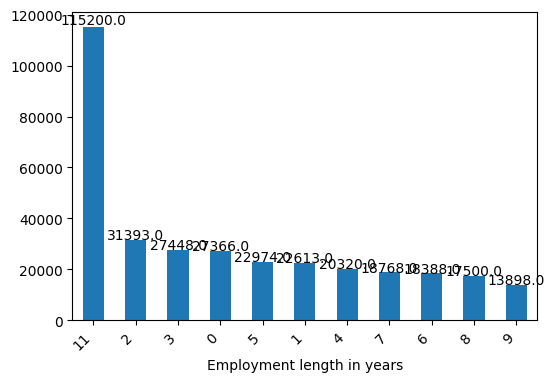

In [21]:
plt.figure(figsize=(6,4))
plot = data['emp_length'].value_counts().plot(kind='bar')
plt.xlabel('Employment length in years')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Observation: Most of the borrowers in past had 10+ years of experiece. Next comes ones with 2 or 3 years of experience. Least number of borrowers had 9 years of experience

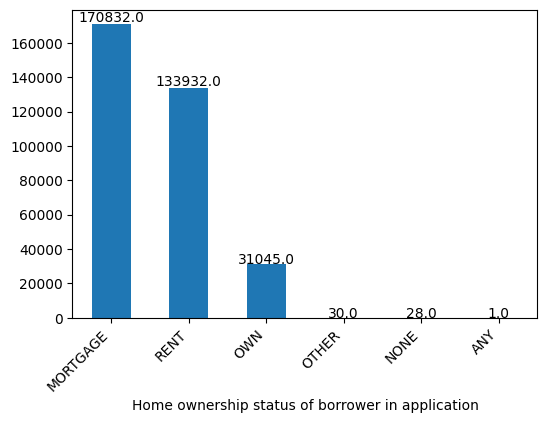

In [22]:
plt.figure(figsize=(6,4))
plot = data['home_ownership'].value_counts().plot(kind='bar')
plt.xlabel('Home ownership status of borrower in application')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Observation: Most borrowers had their home in mortgage. Number of borrowers who were living in rented dwelling were also high. Least number of people actually owned home.

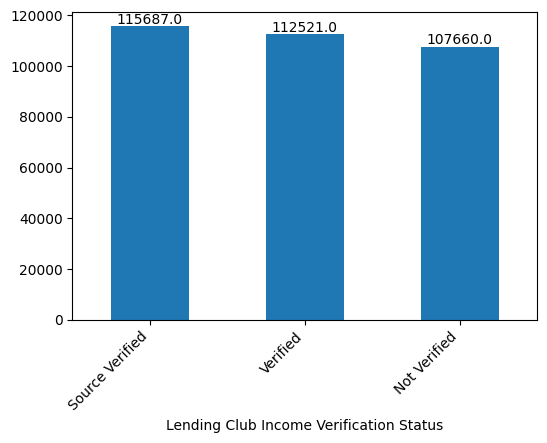

In [23]:
plt.figure(figsize=(6,4))
plot = data['verification_status'].value_counts().plot(kind='bar')
plt.xlabel('Lending Club Income Verification Status')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Observation: Most borrowers in the past had their income source verified. Around one third of the records shows people whose income wasn't verified

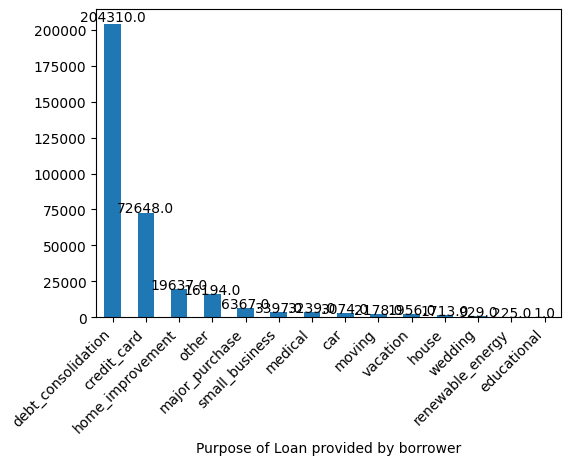

In [24]:
plt.figure(figsize=(6,4))
plot = data['purpose'].value_counts().plot(kind='bar')
plt.xlabel('Purpose of Loan provided by borrower')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Observation: Most of the borrowers applied for loan for debt consolidation. Least number of people applied for loan for educational purposes

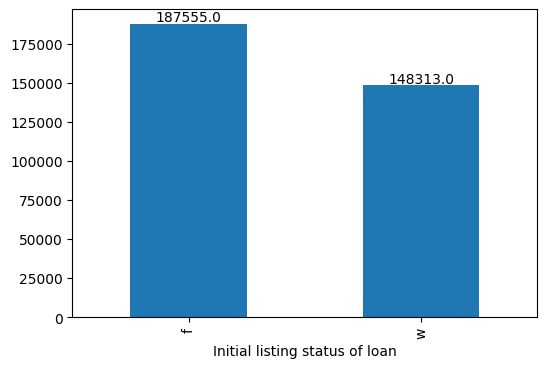

In [25]:
plt.figure(figsize=(6,4))
plot = data['initial_list_status'].value_counts().plot(kind='bar')
plt.xlabel('Initial listing status of loan')
show_values(plot)

Observation: People who got fractional loan in the beginning were more than ones who got loan as a whole

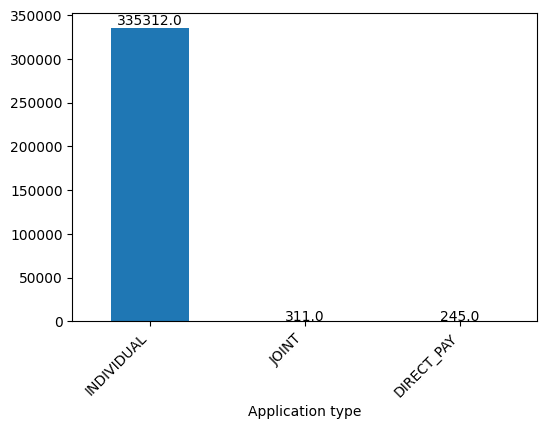

In [26]:
plt.figure(figsize=(6,4))
plot = data['application_type'].value_counts().plot(kind='bar')
plt.xlabel('Application type')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Observation: Most of the records shows application type as individual. Least number of applications shows direct pay

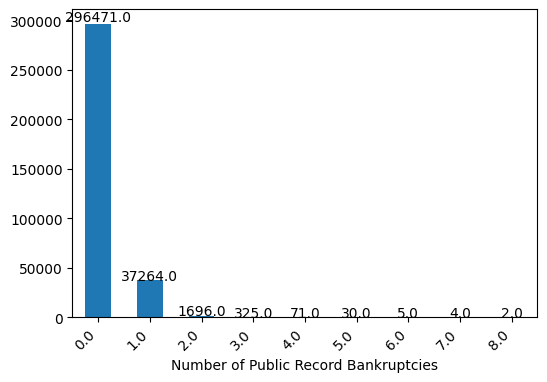

In [27]:
plt.figure(figsize=(6,4))
plot = data['pub_rec_bankruptcies'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Public Record Bankruptcies')
show_values(plot)

Observation: Most borrowers in the past had no public record bankruptcies. A few number of people were bankrupt once. Least number of people had bankruptcies more than 2.

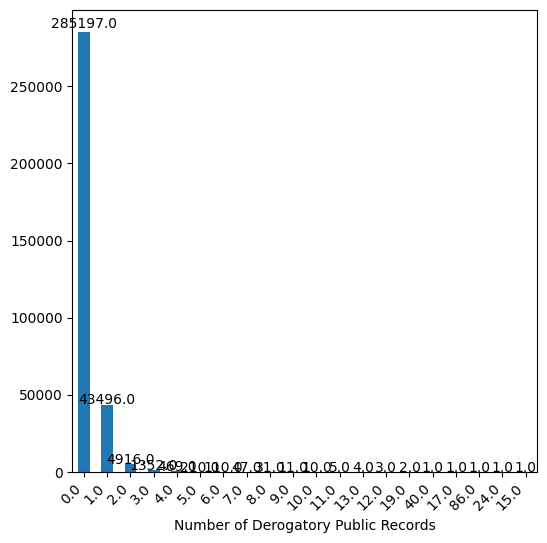

In [28]:
plt.figure(figsize=(6,6))
plot = data['pub_rec'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Derogatory Public Records')
show_values(plot)

Observation: Most borrowers in the past had no derogatory public records. A few people had derogatory public record once. Least number of people had derogatory public records more than 2

In [29]:
num_data=num_data=data.select_dtypes(include=['float64'])
num_data.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


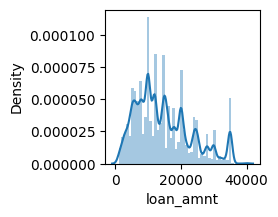

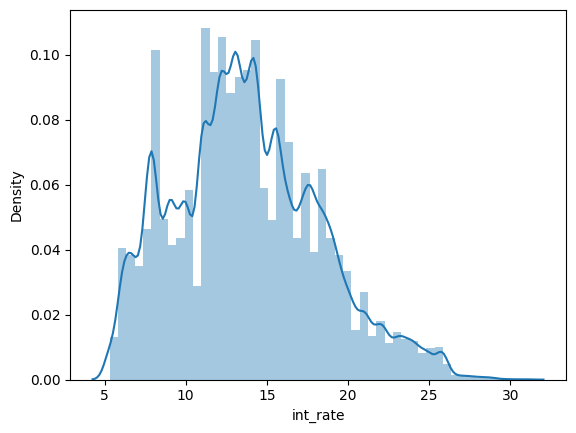

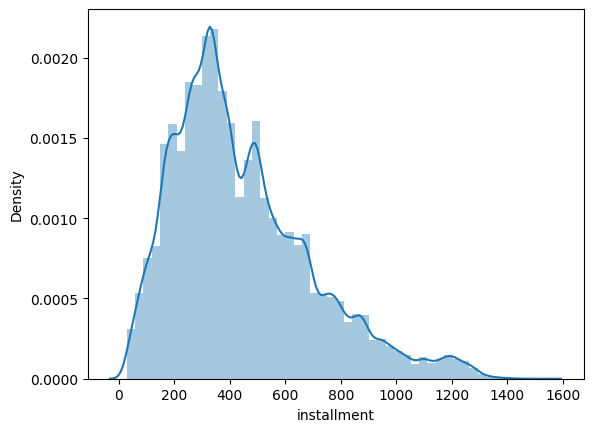

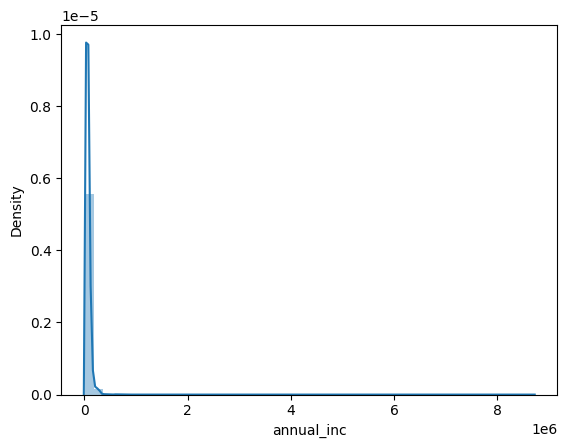

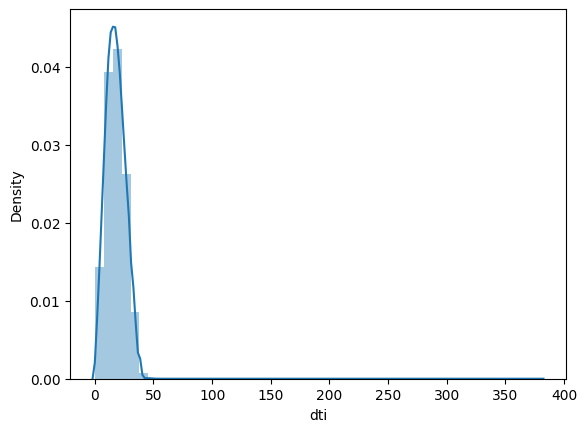

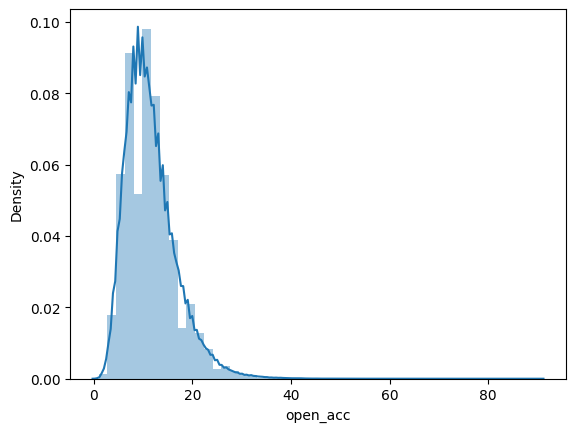

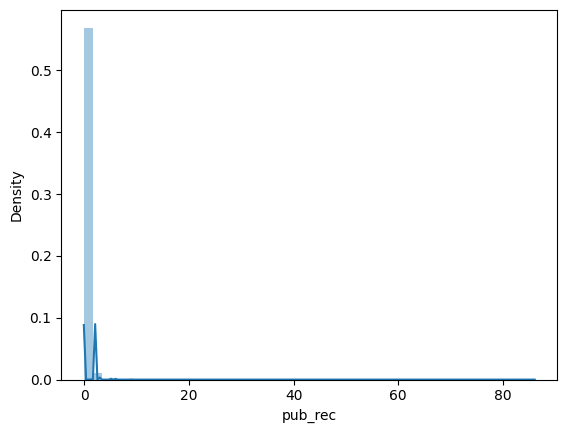

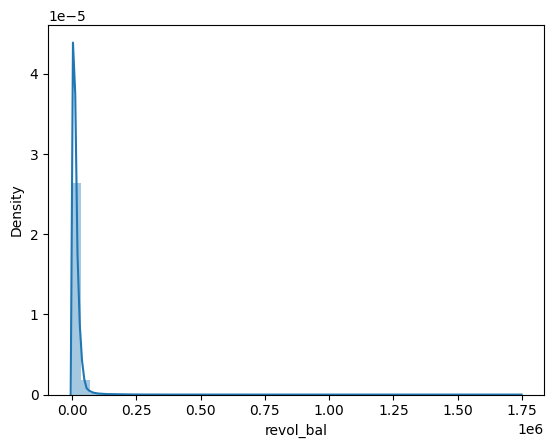

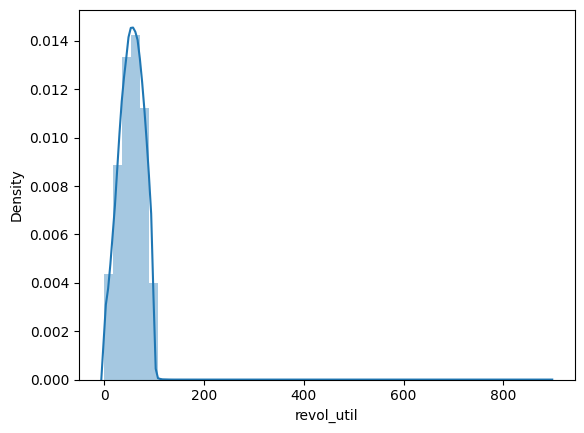

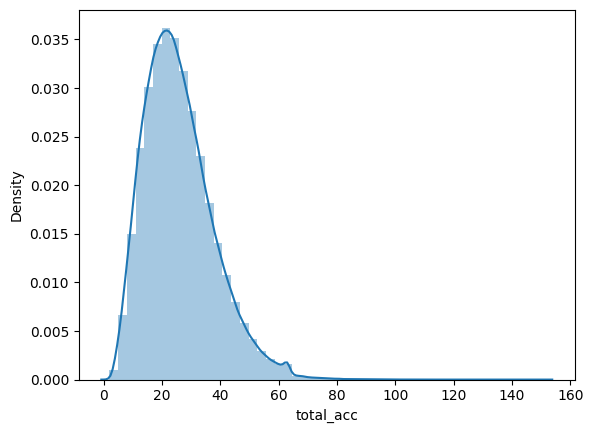

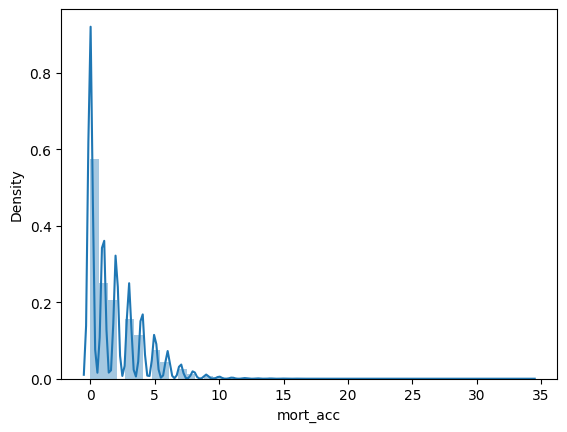

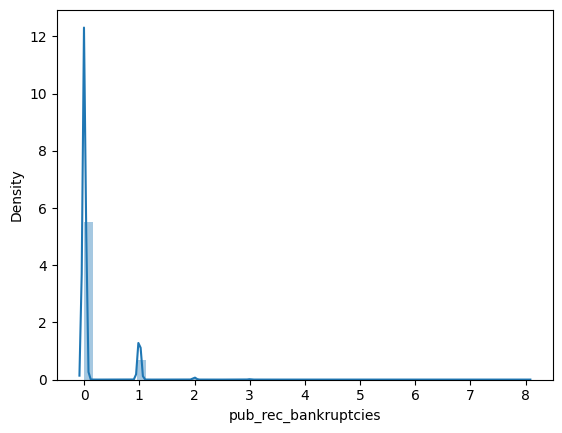

In [30]:
#Distribution plot
plt.figure(figsize=(2,2))
for i in num_data:
  sns.distplot(num_data[i])
  plt.show()

**2. Bivariate Analysis**

In [31]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [32]:
# This function plots a given column against loan_status (default = 'Charged Off')
# The plots are in percentages 
# We want to see what are the chances of some category leading to loan default
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [33]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [34]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (data[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (data.loc[data['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    
    showLabels(ax)

In [35]:
#Create Derived categorical variable
data['loan_amount'] = pd.cut(data['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

<Axes: xlabel='loan_amount', ylabel='% of loans Charged Off'>

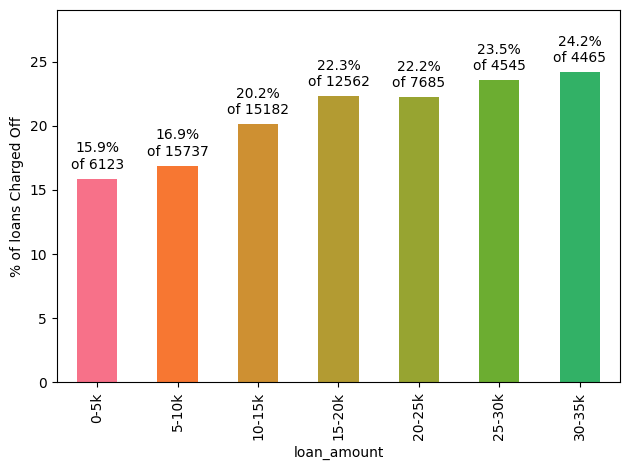

In [36]:
plotLoanStatus(data, 'loan_amount')

In [37]:
data.drop(data[['loan_amount']],axis=1, inplace=True)

Observation:

The % of charged off loans increases substancially as we go up the loan amount buckets. The higher loans, though lesser in number, carry a substantially higher risk of default

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

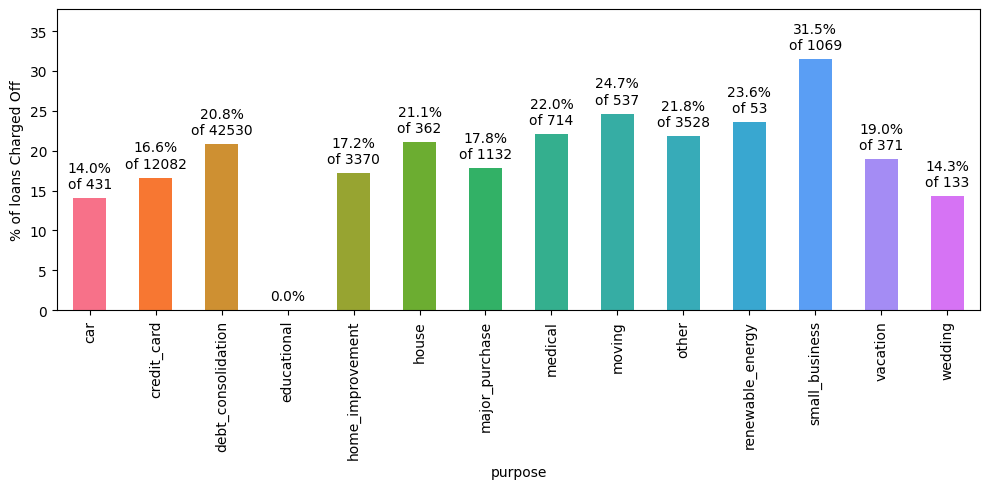

In [38]:
plt.figure(figsize=(10, 5))
plotLoanStatus(data, 'purpose')

Observation:

31.5% of loans for small business are Charged Off. Making them the most risky purpose. Approximately ~21% of the loans are issued for the purpose of dept consolidation. And for the educationalpurpose there is no charged off loans.

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

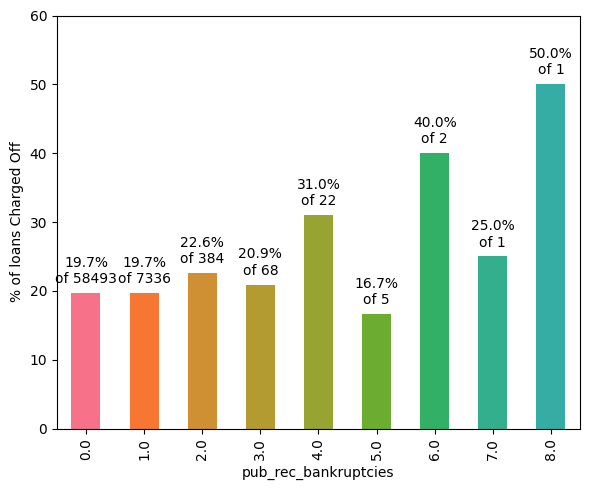

In [39]:

plt.figure(figsize=(6,5))
plotLoanStatus(data, 'pub_rec_bankruptcies')

Observation:

The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy. The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases.

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

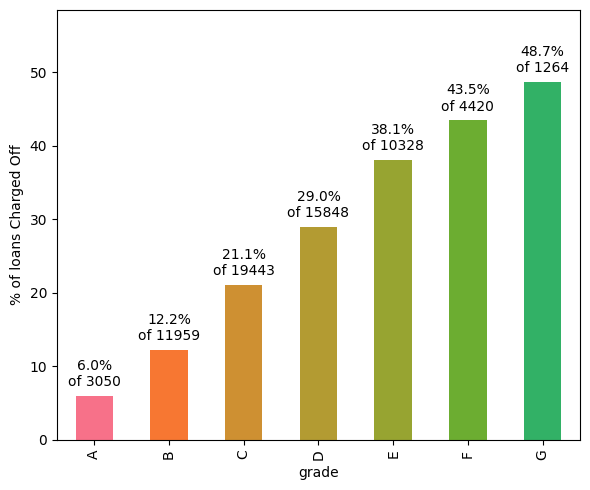

In [40]:
plt.figure(figsize=(6,5))
plotLoanStatus(data, 'grade')

Observation:
As grade increases the percentage of charges off loans also increases.

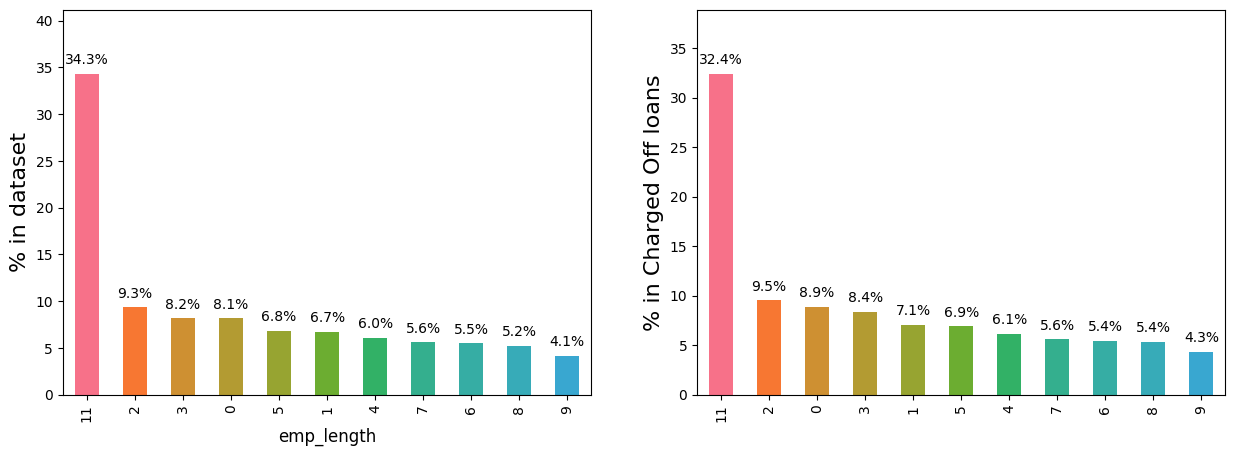

In [41]:
plt.figure(figsize=(15, 5))
plot_percentages(data, 'emp_length')

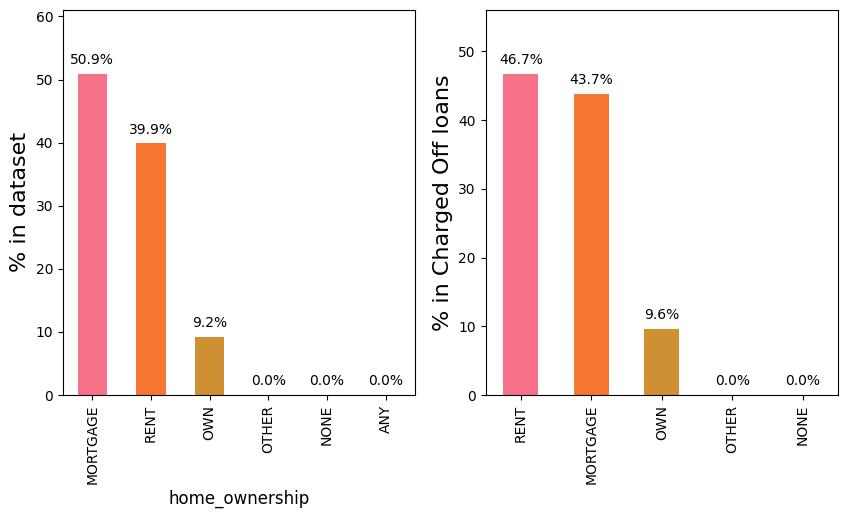

In [42]:
plt.figure(figsize=(10,5))
plot_percentages(data, 'home_ownership')

Observation:
 Employment length and home ownership has no relationship with loan status

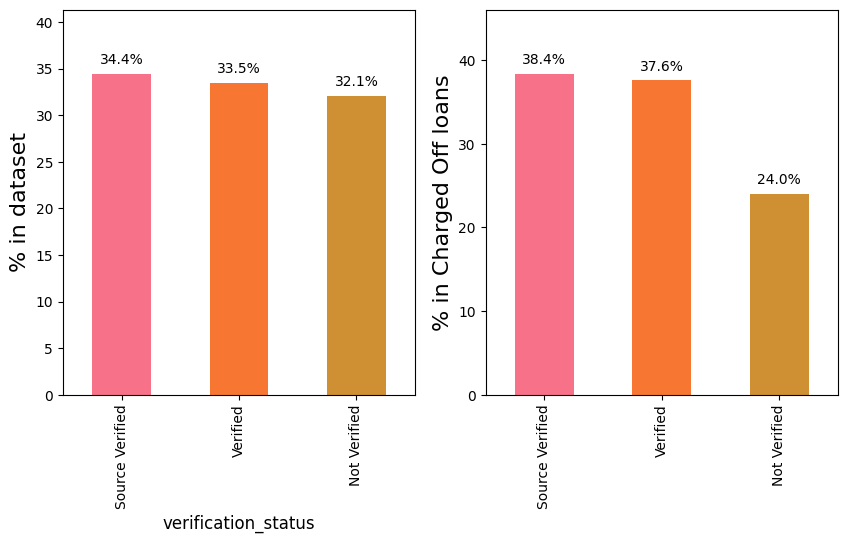

In [43]:
plt.figure(figsize=(10,5))
plot_percentages(data, 'verification_status')

Observation:
Verified loans shows more charged off percentage as compared to Not verified.

In [44]:
data['dti1'] = pd.cut(data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

<Axes: xlabel='dti1', ylabel='% of loans Charged Off'>

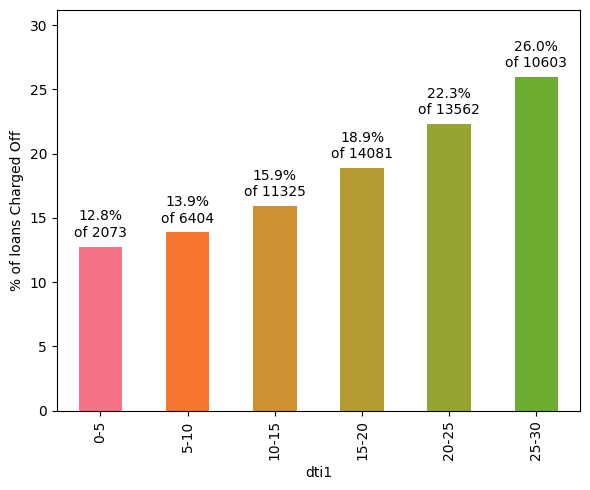

In [45]:
plt.figure(figsize=(6,5))
plotLoanStatus(data, 'dti1')

In [46]:
data.drop(data[['dti1']],axis=1, inplace=True)

Observation:
As the debt to income ratio increases the %of charged off lon also increased

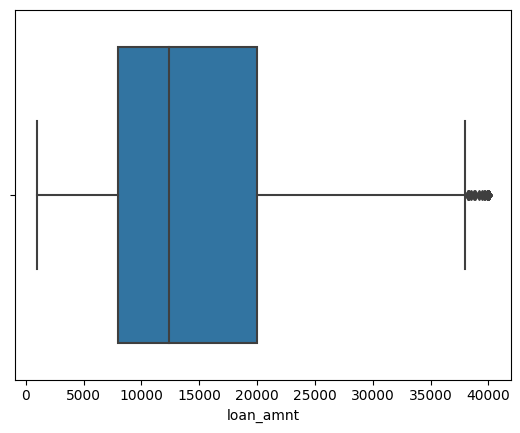

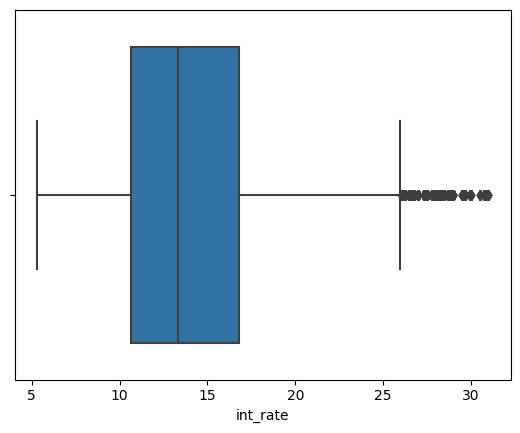

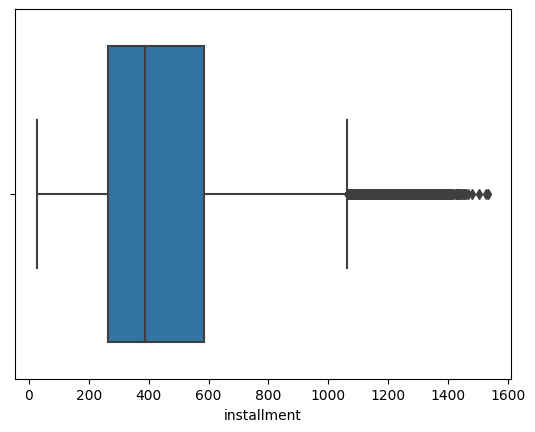

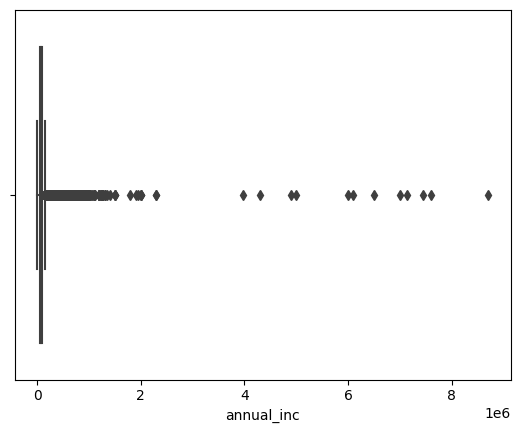

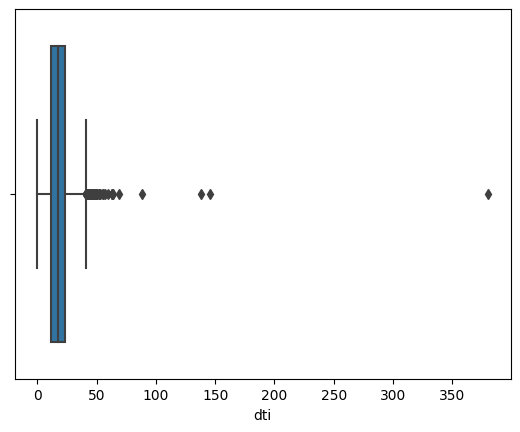

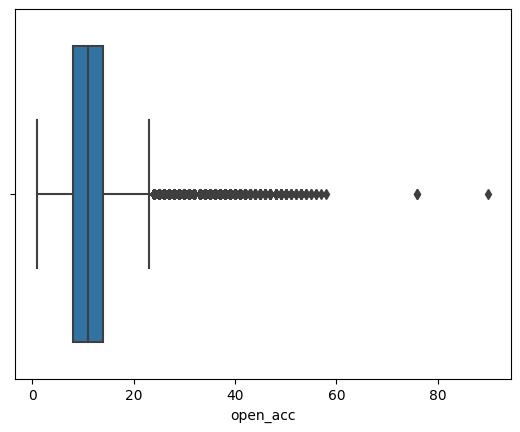

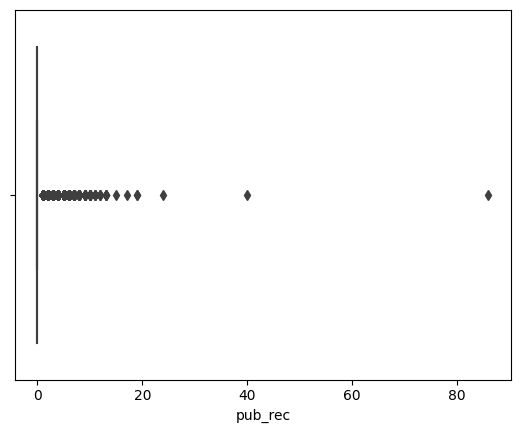

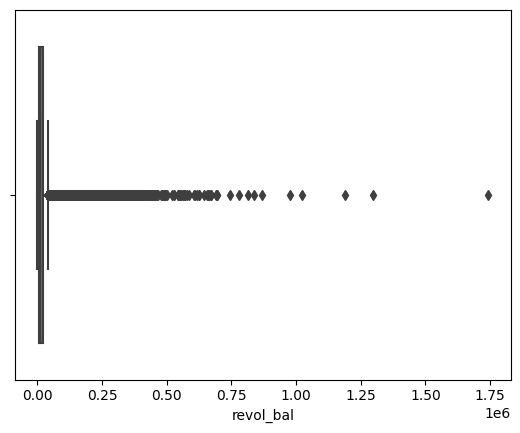

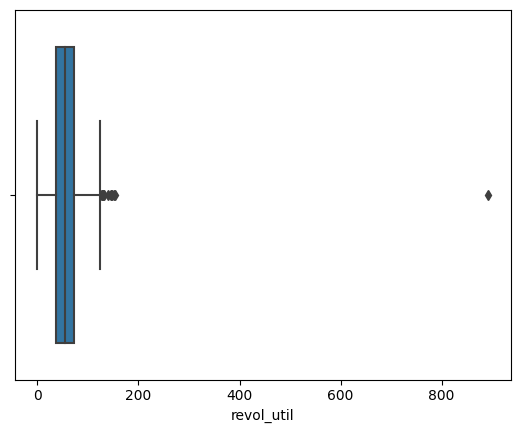

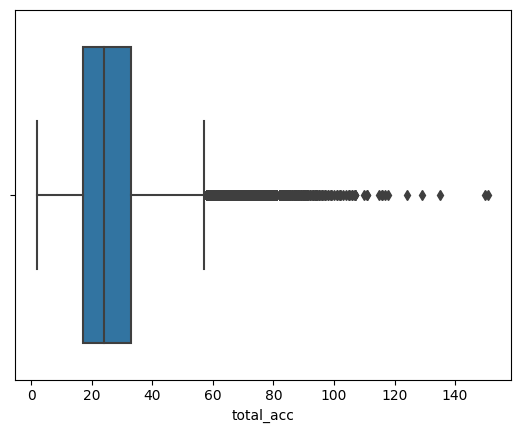

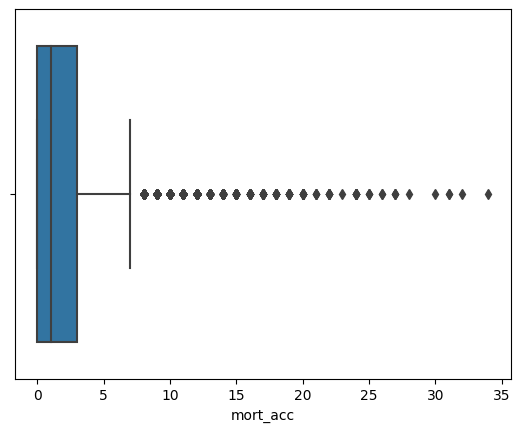

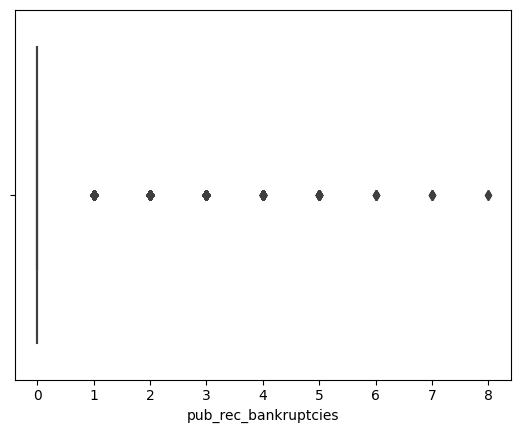

In [47]:
for i in num_data:
  sns.boxplot(x=num_data[i])
  plt.show()

### **DATA PREPROCESSING**

Outliers found in: loan_amnt,int_rate,installment,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc

**1. Outlier removal**

Removing outlier using Interquartile range method

In [48]:
from scipy import stats

In [49]:
# Calculate the IQR
IQR =stats.iqr(data.annual_inc,interpolation='midpoint')
IQR

43000.0

In [50]:
Q1=data.annual_inc.quantile(0.25)
Q3=data.annual_inc.quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-17500.0, 154500.0)

In [51]:
# Remove outliers
data.drop(data[(data['annual_inc']>max_limit)].index,inplace=True)

In [52]:
IQR =stats.iqr(data.revol_bal,interpolation='midpoint')
Q1=data.revol_bal.quantile(0.25)
Q3=data.revol_bal.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
data.drop(data[(data['revol_bal']>max_limit)].index,inplace=True)

In [53]:
IQR =stats.iqr(data.loan_amnt,interpolation='midpoint')


In [54]:
Q1=data.loan_amnt.quantile(0.25)
Q3=data.loan_amnt.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

data.loc[data['loan_amnt']>max_limit,'loan_amnt']=np.median(data.loan_amnt)

In [55]:
data.loc[data.loan_amnt>max_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [56]:
IQR =stats.iqr(data.int_rate,interpolation='midpoint')
IQR
Q1=data.int_rate.quantile(0.25)
Q3=data.int_rate.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.304999999999998, 25.465000000000003)

In [57]:
data.loc[data['int_rate']>max_limit,'int_rate']=np.median(data.int_rate)
data.loc[data.int_rate>max_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [58]:
IQR =stats.iqr(data.dti,interpolation='midpoint')
IQR

11.69

In [59]:
Q1=data.dti.quantile(0.25)
Q3=data.dti.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
data.loc[data.dti<min_limit]
data.loc[data['dti']>max_limit,'dti']=np.median(data.dti)
data.loc[data.dti>max_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [60]:
IQR =stats.iqr(data.open_acc,interpolation='midpoint')
IQR
Q1=data.open_acc.quantile(0.25)
Q3=data.open_acc.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
data.loc[data.open_acc>max_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
346,20400.0,60,18.24,520.70,D,D5,Sales Representative,4,RENT,51000.0,...,25.0,1.0,13284.0,26.0,38.0,w,INDIVIDUAL,0.0,0.0,"95540 Barnes Summit Suite 139\nNorth Corey, MI..."
364,25000.0,60,11.44,549.07,B,B4,Store Manager,11,MORTGAGE,99000.0,...,26.0,0.0,29067.0,39.2,49.0,w,INDIVIDUAL,3.0,0.0,"37658 Pugh Rest\nWest Patriciatown, WV 30723"
390,17400.0,36,11.39,572.88,B,B3,Landside Officer 1,11,OWN,81000.0,...,28.0,0.0,22092.0,53.5,47.0,w,INDIVIDUAL,1.0,0.0,"031 Marie Green\nRobinberg, DC 05113"
512,26000.0,36,19.19,955.56,E,E3,teacher,11,MORTGAGE,65000.0,...,25.0,0.0,23519.0,42.7,55.0,w,INDIVIDUAL,3.0,0.0,"3689 Lisa Cliffs\nLindaberg, MN 00813"
526,3000.0,36,16.99,106.95,D,D3,Law Enforcement Officer,8,MORTGAGE,78000.0,...,34.0,0.0,25728.0,61.0,58.0,f,INDIVIDUAL,2.0,0.0,"PSC 8557, Box 6891\nAPO AE 30723"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395752,10500.0,60,10.99,228.25,B,B4,coordinator/teacher,11,MORTGAGE,85000.0,...,29.0,0.0,30993.0,35.7,42.0,w,INDIVIDUAL,1.0,0.0,"158 Owen Village Suite 776\nLake Cynthia, AR 2..."
395776,25000.0,36,10.99,818.35,B,B3,SALES,11,MORTGAGE,120000.0,...,24.0,0.0,28464.0,53.6,53.0,f,INDIVIDUAL,2.0,0.0,"203 Hogan Terrace\nTylerchester, ND 30723"
395961,9900.0,36,14.99,343.14,C,C5,Manager,3,RENT,60000.0,...,38.0,1.0,8215.0,39.7,48.0,f,INDIVIDUAL,0.0,1.0,"11978 Lynn Parkway Suite 212\nNew Joseville, N..."
395965,24000.0,60,19.52,629.47,E,E2,General Manager,1,RENT,105000.0,...,24.0,0.0,13144.0,23.6,33.0,f,INDIVIDUAL,1.0,0.0,"6894 Steven Fall Apt. 896\nBradleychester, ID ..."


In [61]:
data.loc[data['open_acc']>max_limit,'open_acc']=np.median(data.open_acc)
data.loc[data['open_acc']>max_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [62]:
IQR =stats.iqr(data.mort_acc,interpolation='midpoint')
IQR

3.0

In [63]:
Q1=data.mort_acc.quantile(0.25)
Q3=data.mort_acc.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
data.loc[data['mort_acc']>max_limit,'mort_acc']=np.median(data.mort_acc)
data.loc[data['mort_acc']>max_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [64]:
IQR =stats.iqr(data.total_acc,interpolation='midpoint')
IQR

15.0

In [65]:
Q1=data.total_acc.quantile(0.25)
Q3=data.total_acc.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit
data.loc[data['total_acc']>max_limit,'total_acc']=np.median(data.total_acc)
data.loc[data['total_acc']>max_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [66]:
cat_data=data.select_dtypes(include=['object'])

PLOTS AFTER OUTLIER REMOVAL

In [67]:
num_data=num_data=data.select_dtypes(include=['float64'])

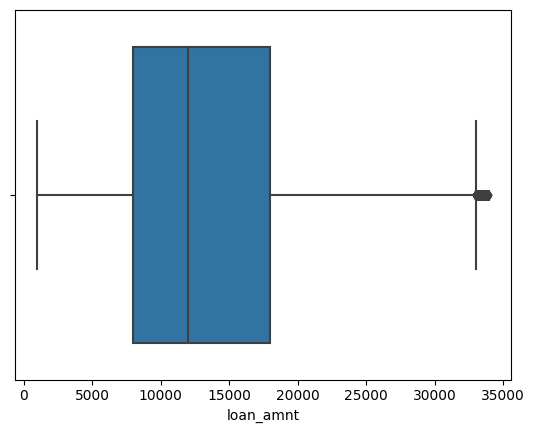

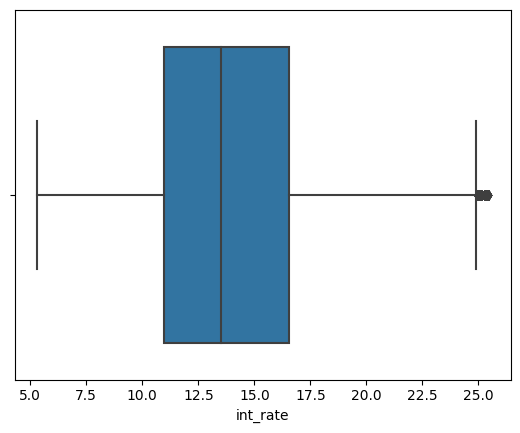

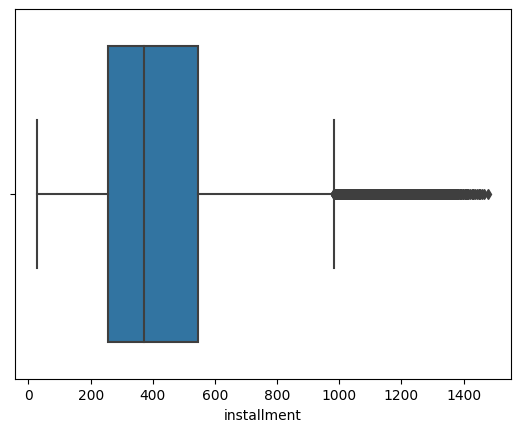

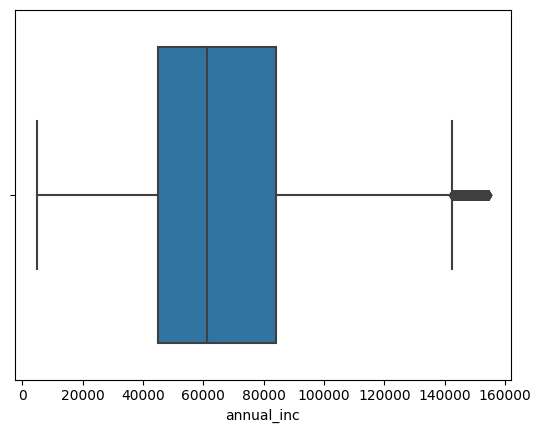

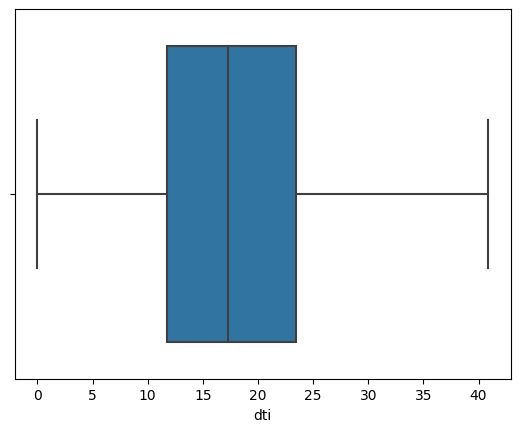

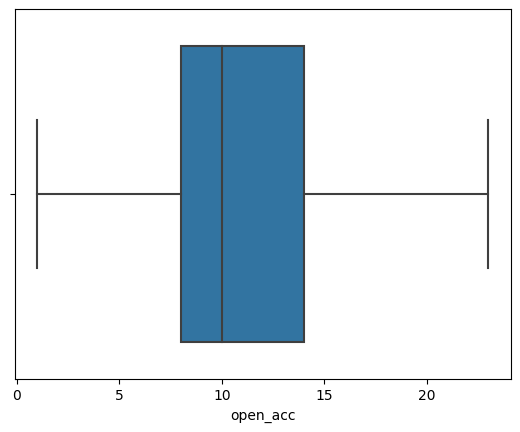

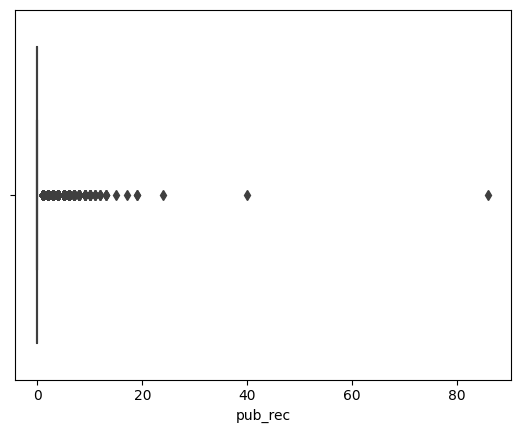

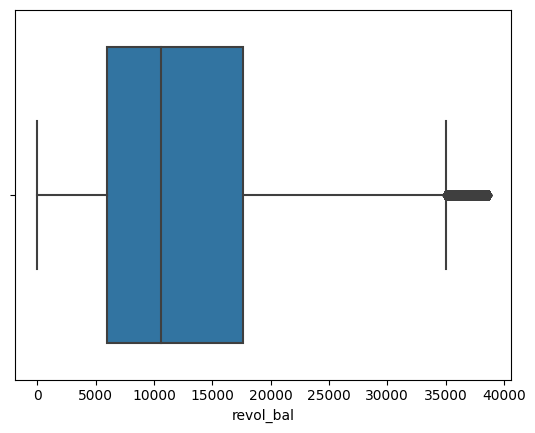

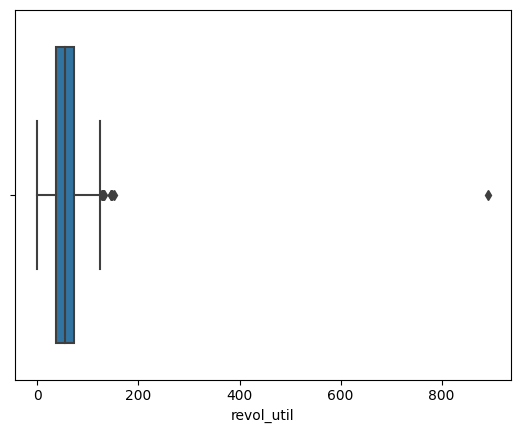

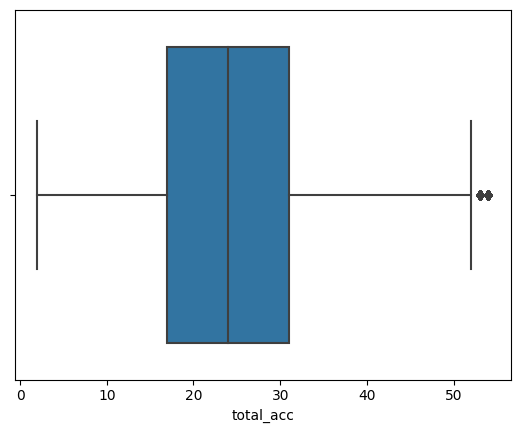

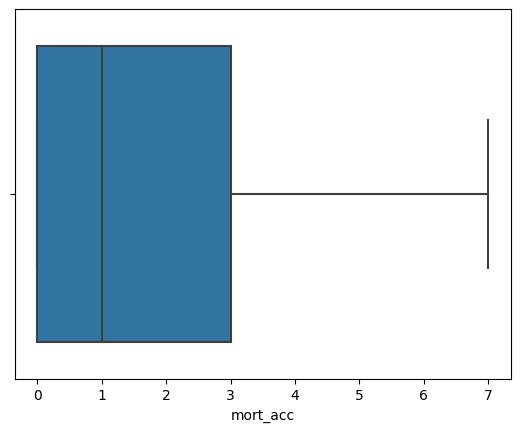

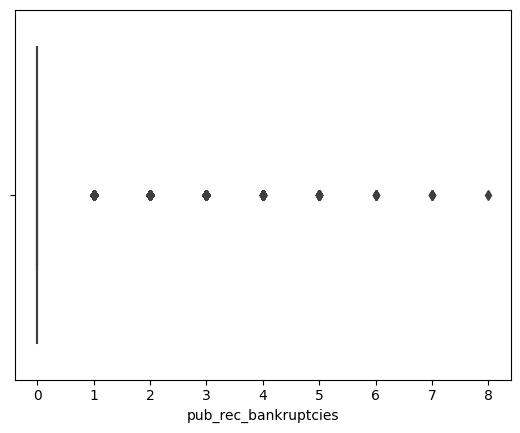

In [68]:
for i in num_data:
  sns.boxplot(x=num_data[i])
  plt.show()

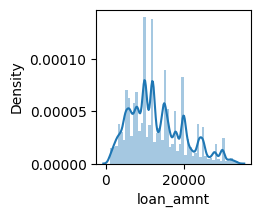

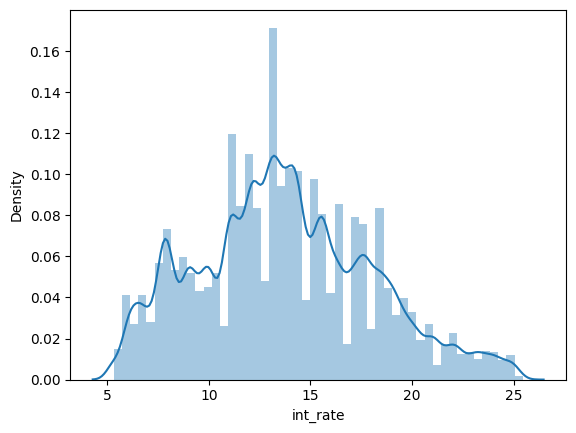

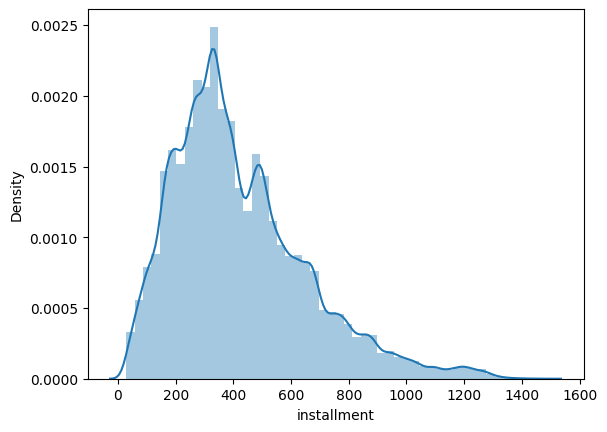

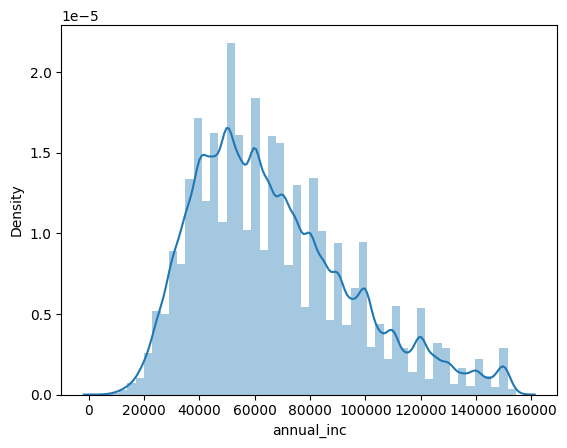

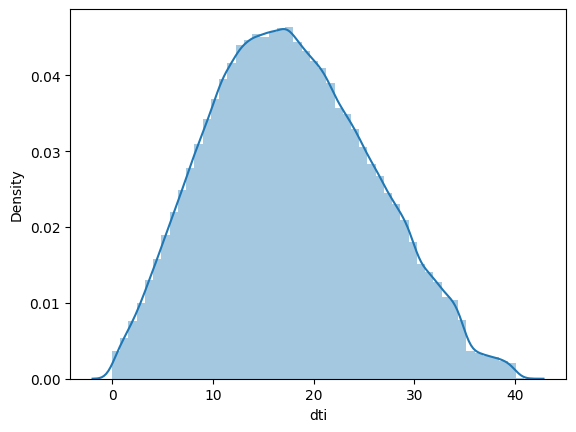

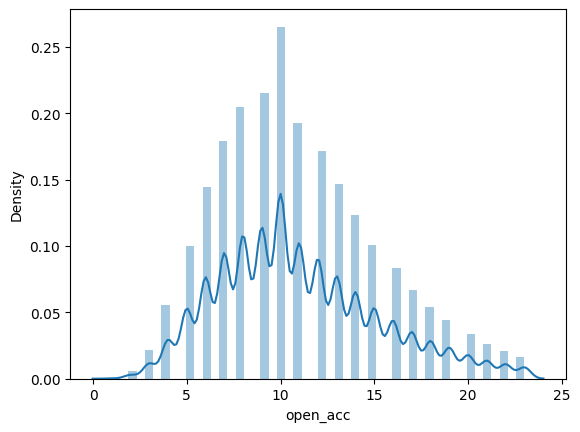

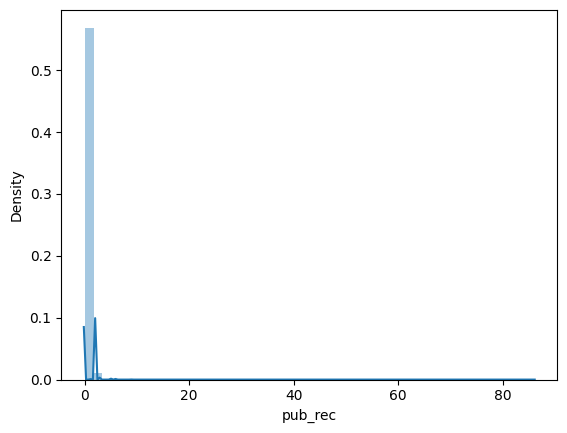

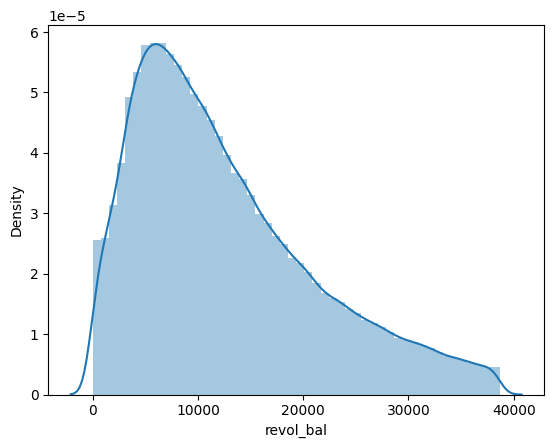

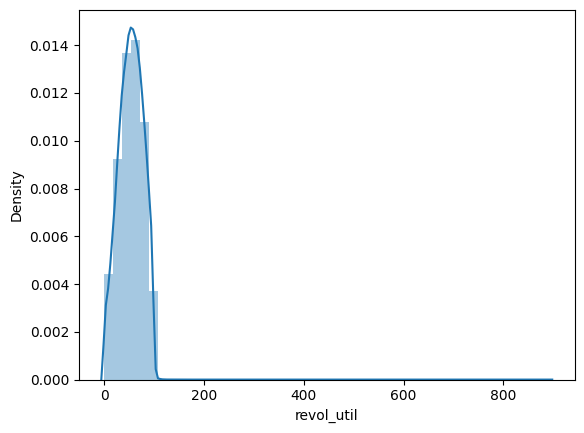

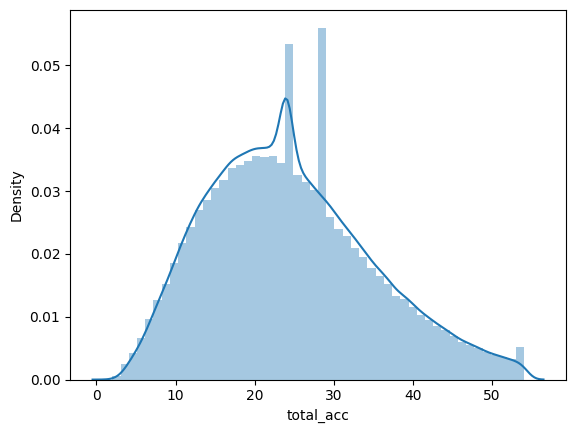

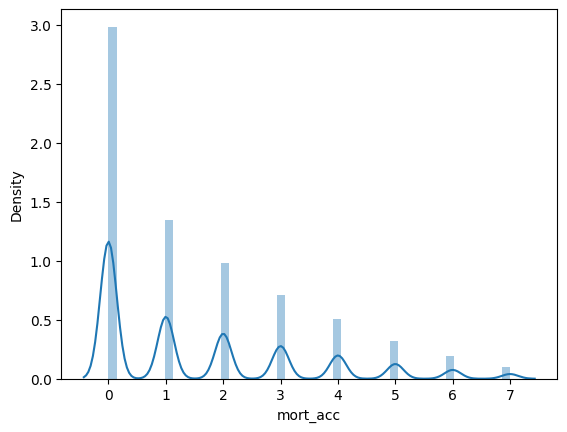

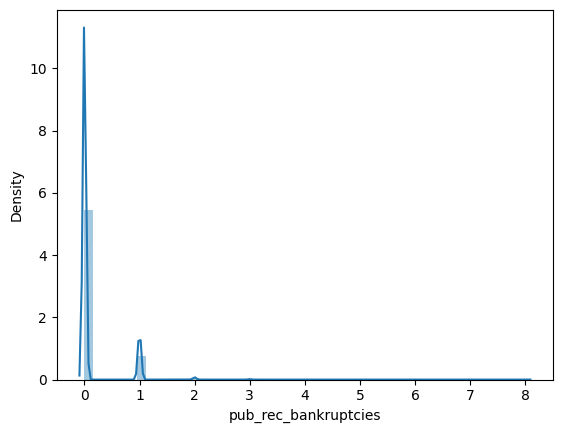

In [69]:
plt.figure(figsize=(2,2))
for i in num_data:
  sns.distplot(num_data[i])
  plt.show()

In [70]:
org_data = data.copy()

**2. LABEL ENCODING**

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le=LabelEncoder()
data['emp_title']=le.fit_transform(data['emp_title'])
data['home_ownership']=le.fit_transform(data['home_ownership'])
data['verification_status']=le.fit_transform(data['verification_status'])
data['purpose']=le.fit_transform(data['purpose'])
data['application_type']=le.fit_transform(data['application_type']) 
data['initial_list_status']=le.fit_transform(data['initial_list_status'])
data['sub_grade']=le.fit_transform(data['sub_grade'])


MAP TARGET COLUMN VALUES TO 0 AND 1

In [73]:
data['loan_status'] = data['loan_status'].map({"Fully Paid": 1, "Charged Off": 0})

In [74]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,8,65117,11,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,9,26940,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,7,102543,0,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,1,22325,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,14,31005,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [75]:
# Dropping irrelevant columns for prediction
data.drop(data[['address','title','issue_d']],axis=1, inplace=True)

In [76]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,8,65117,11,5,117000.0,...,1990,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0
1,8000.0,36,11.99,265.68,B,9,26940,4,1,65000.0,...,2004,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0
2,15600.0,36,10.49,506.97,B,7,102543,0,5,43057.0,...,2007,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0
3,7200.0,36,6.49,220.65,A,1,22325,6,5,54000.0,...,2006,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0
4,24375.0,60,17.27,609.33,C,14,31005,9,1,55000.0,...,1999,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0


In [77]:
data['loan_status'].value_counts()

1    243593
0     61092
Name: loan_status, dtype: int64

After outlier removal, data imbalance isn't affected much. Ratio of minority to majority is 1:4 itself

<Axes: >

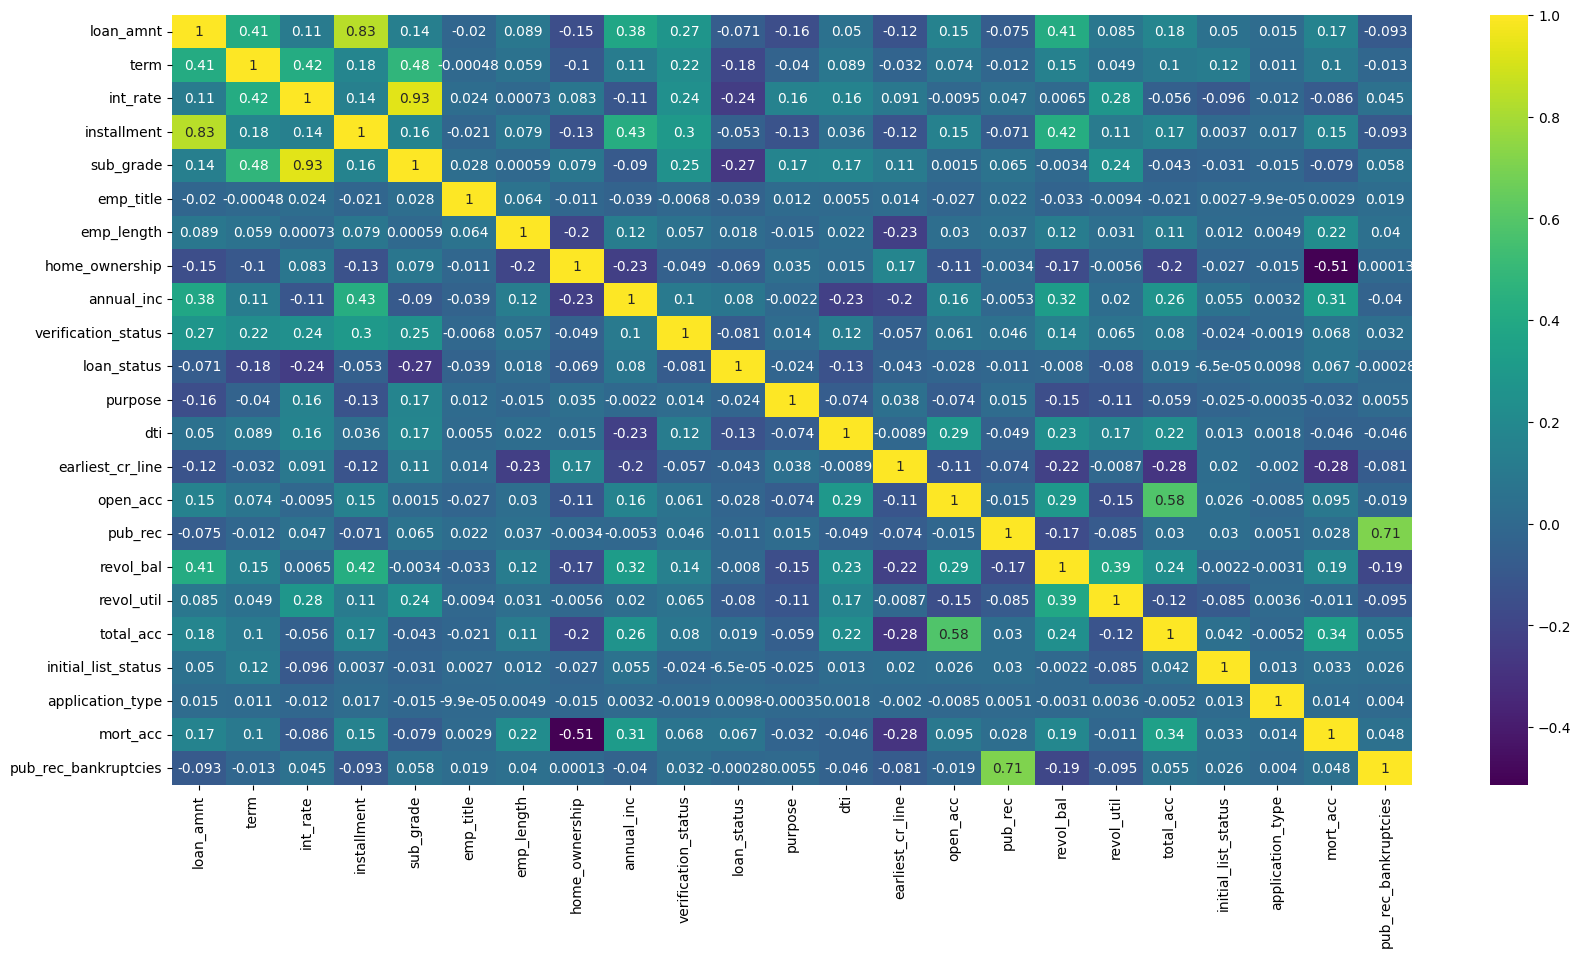

In [78]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [79]:
#droping highly correlated features -- instsallment, grade, mort_acc
data.drop(data[['installment','grade','mort_acc']],axis=1, inplace=True)


In [80]:
# Identify column names
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [81]:
# Droping irrelevant column
data.drop(data[['earliest_cr_line','annual_inc']],axis=1, inplace=True)


In [82]:
# split data into feature and target
x = data.drop(['loan_status'], axis=1)
y = data['loan_status']

**3. SCALING**

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
data_scaled.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
0,0.273349,0.0,0.304175,0.235294,0.465471,1.000000,1.0,0.0,0.923077,0.641722,0.681818,0.0,0.940545,0.046845,0.442308,1.0,0.5,0.0
1,0.212604,0.0,0.331511,0.264706,0.192573,0.363636,0.2,0.0,0.153846,0.539252,0.727273,0.0,0.520611,0.059733,0.480769,0.0,0.5,0.0
2,0.443432,0.0,0.256958,0.205882,0.733000,0.000000,1.0,0.5,0.076923,0.312790,0.545455,0.0,0.309998,0.103328,0.461538,0.0,0.5,0.0
3,0.188307,0.0,0.058151,0.029412,0.159584,0.545455,1.0,0.0,0.076923,0.063585,0.227273,0.0,0.141512,0.024095,0.211538,0.0,0.5,0.0
4,0.709947,1.0,0.593936,0.411765,0.221631,0.818182,0.2,1.0,0.076923,0.830276,0.545455,0.0,0.635771,0.078225,0.788462,0.0,0.5,0.0


**4. NORMALIZATION**

In [85]:
from sklearn import preprocessing
df = preprocessing.normalize(data_scaled)
norm_df = pd.DataFrame(data_scaled, columns=x.columns)
norm_df.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
0,0.273349,0.0,0.304175,0.235294,0.465471,1.000000,1.0,0.0,0.923077,0.641722,0.681818,0.0,0.940545,0.046845,0.442308,1.0,0.5,0.0
1,0.212604,0.0,0.331511,0.264706,0.192573,0.363636,0.2,0.0,0.153846,0.539252,0.727273,0.0,0.520611,0.059733,0.480769,0.0,0.5,0.0
2,0.443432,0.0,0.256958,0.205882,0.733000,0.000000,1.0,0.5,0.076923,0.312790,0.545455,0.0,0.309998,0.103328,0.461538,0.0,0.5,0.0
3,0.188307,0.0,0.058151,0.029412,0.159584,0.545455,1.0,0.0,0.076923,0.063585,0.227273,0.0,0.141512,0.024095,0.211538,0.0,0.5,0.0
4,0.709947,1.0,0.593936,0.411765,0.221631,0.818182,0.2,1.0,0.076923,0.830276,0.545455,0.0,0.635771,0.078225,0.788462,0.0,0.5,0.0


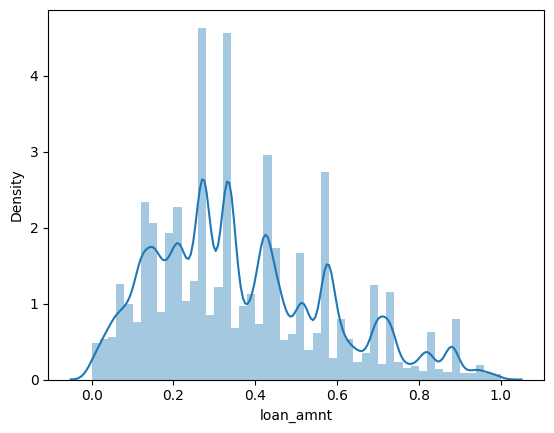

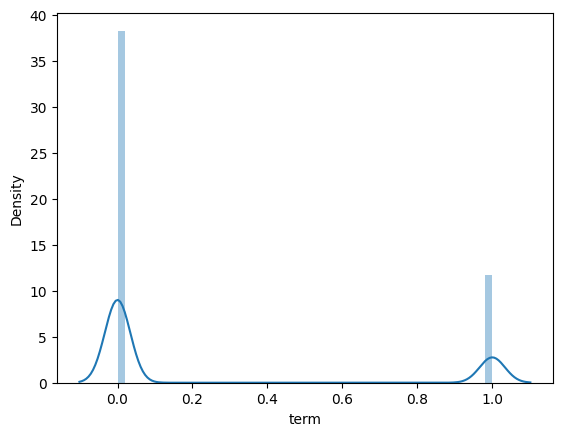

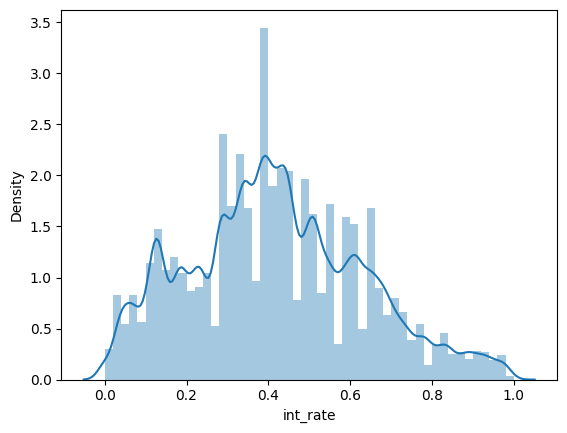

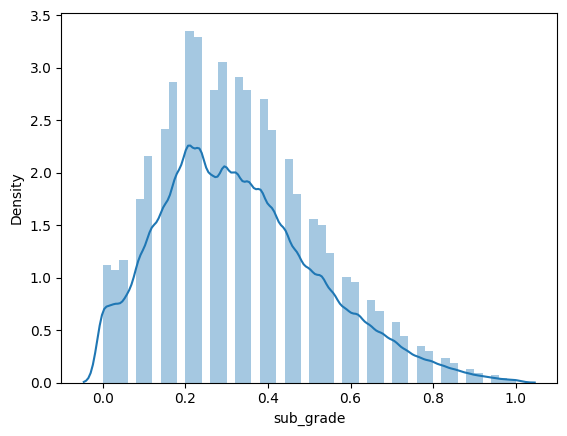

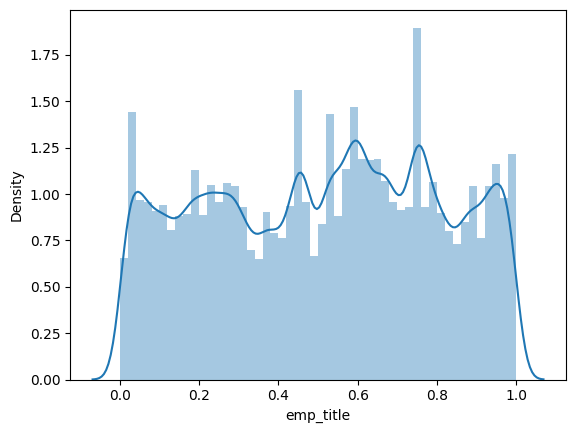

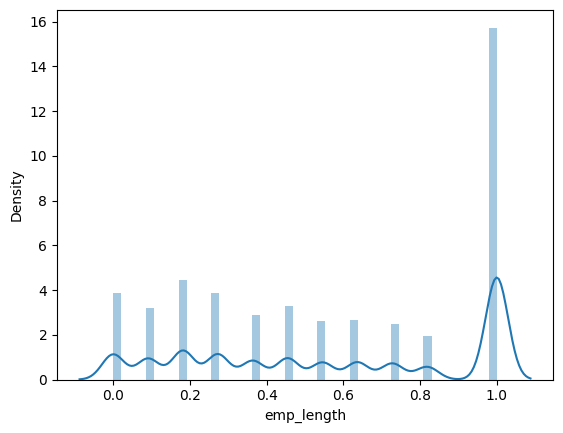

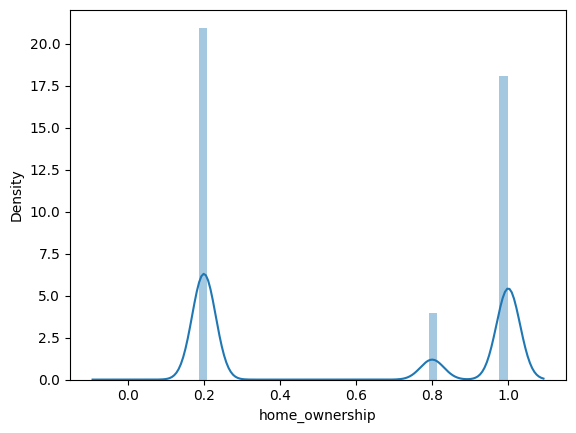

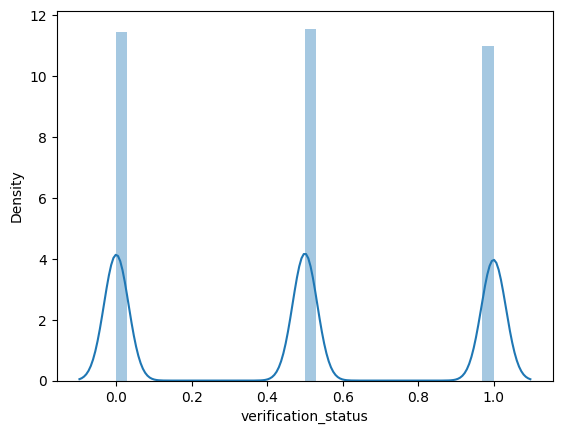

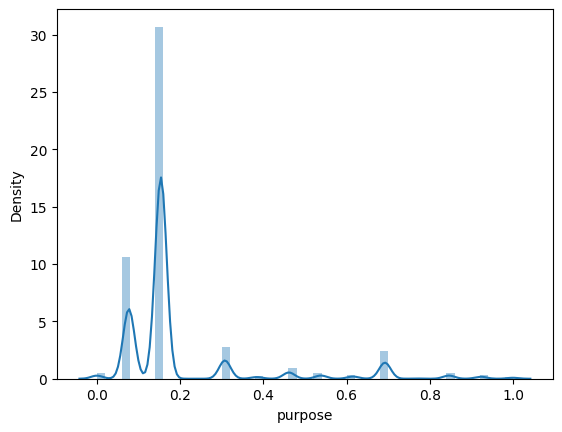

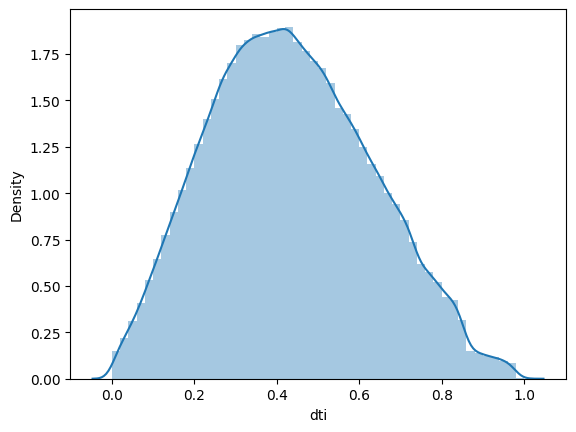

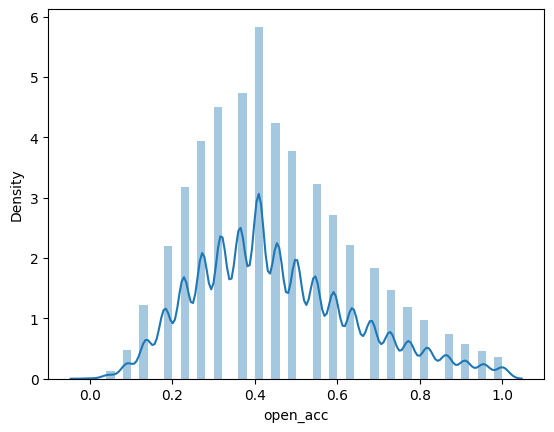

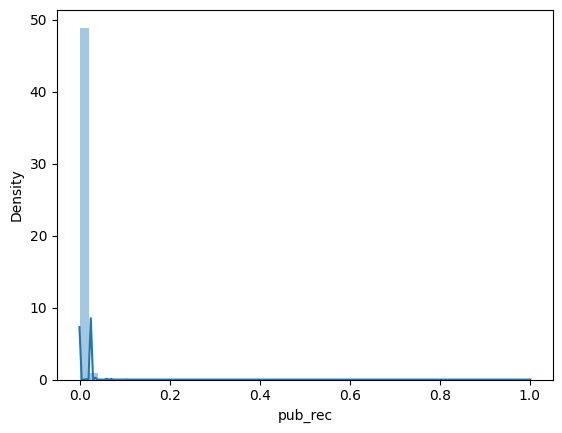

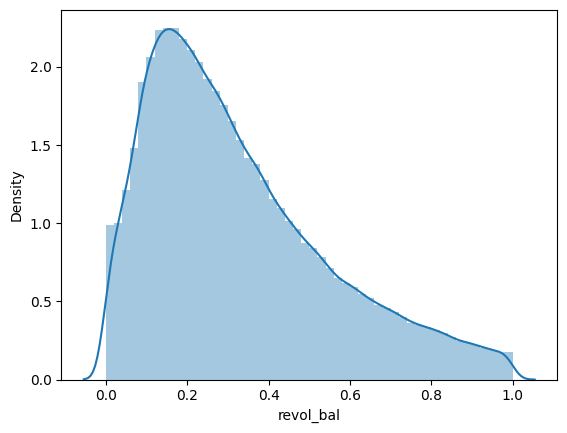

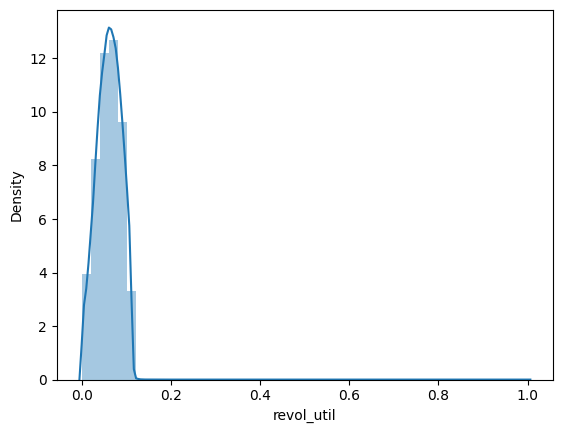

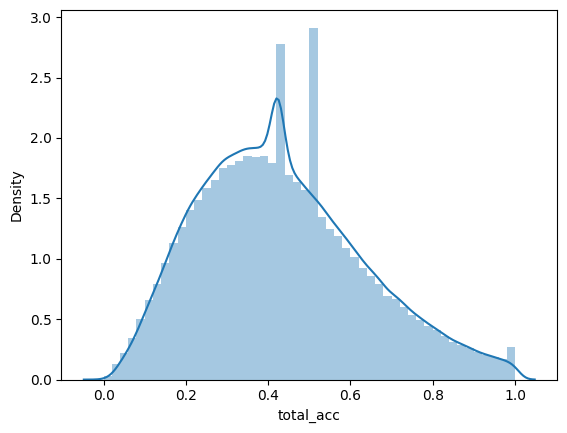

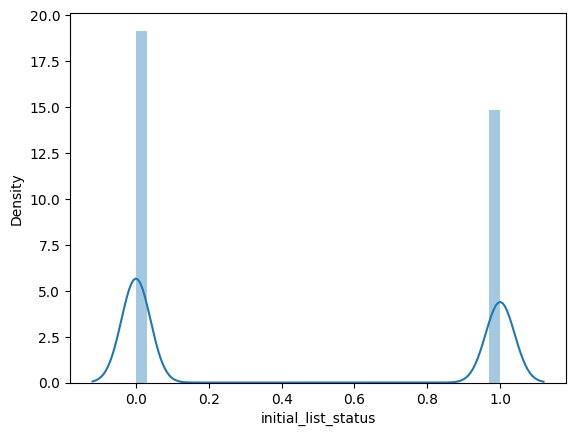

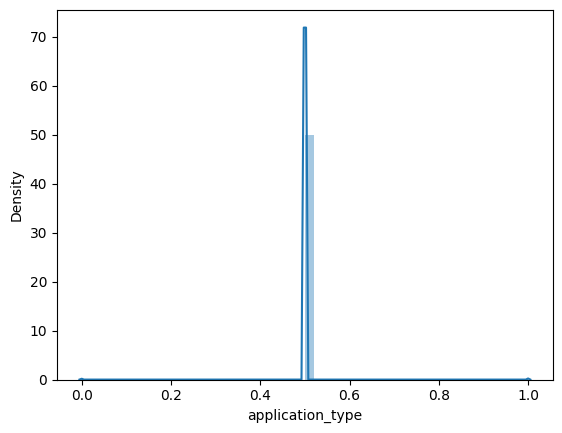

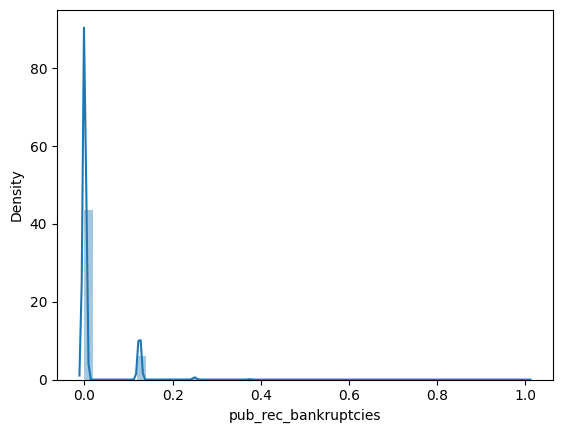

In [86]:
for i in norm_df:
  sns.distplot(norm_df[i])
  plt.show()

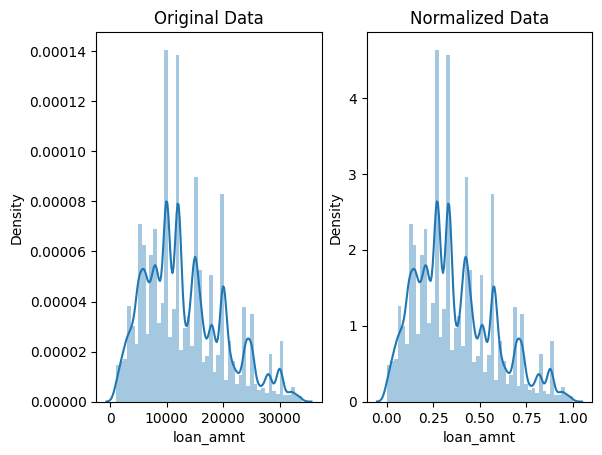

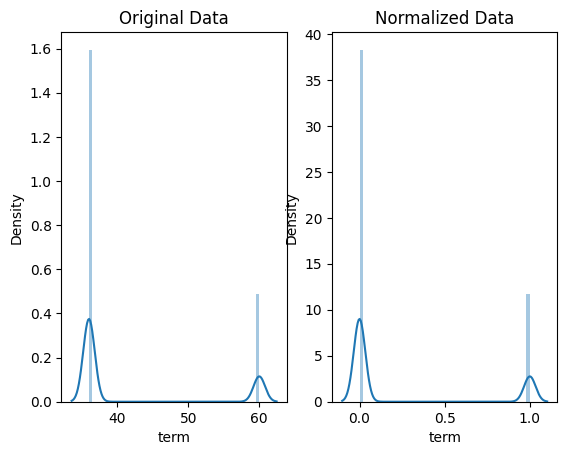

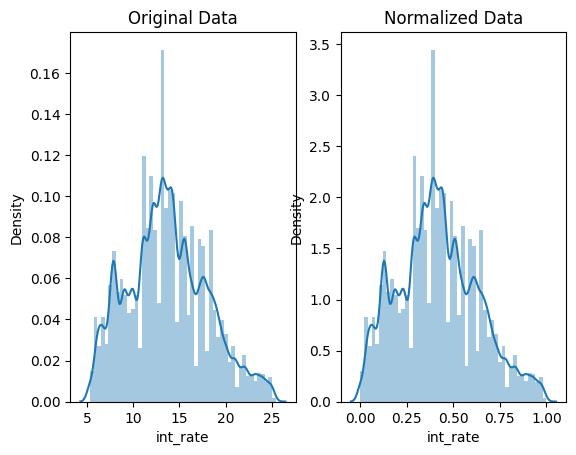

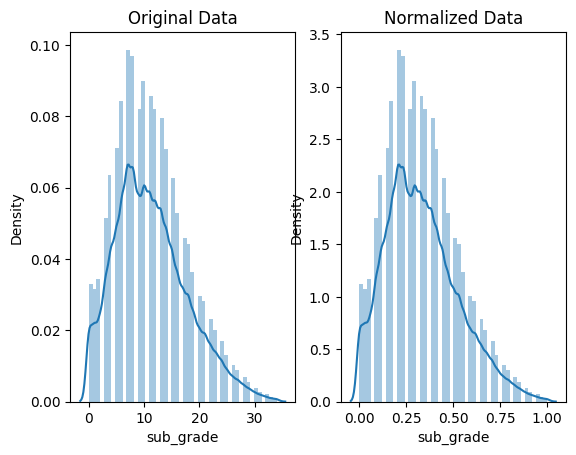

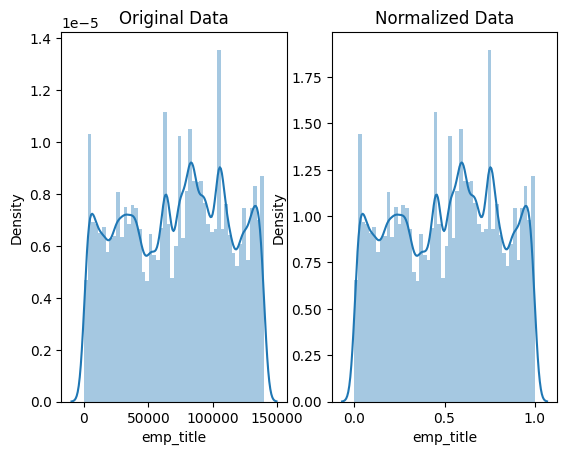

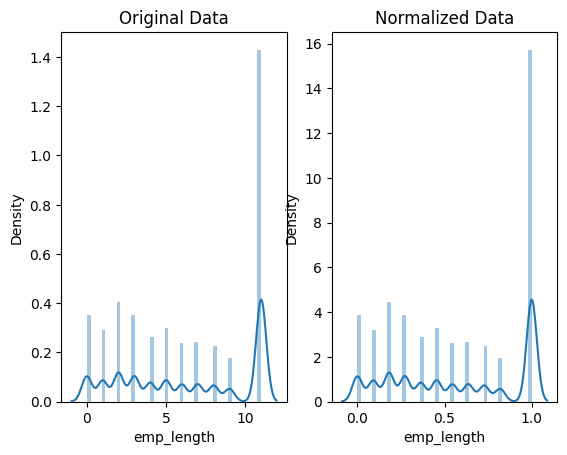

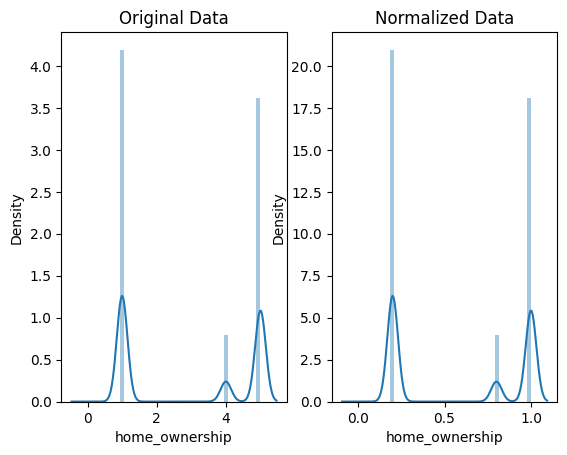

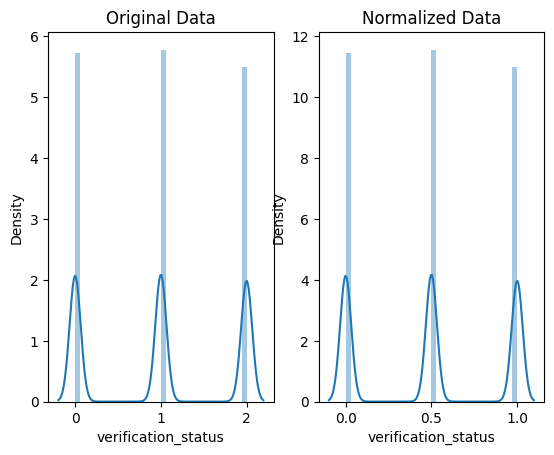

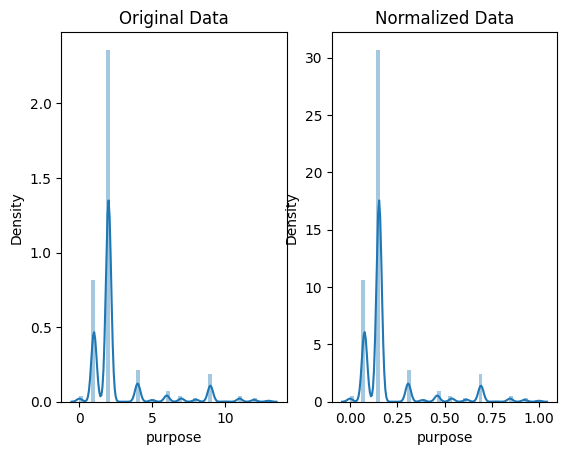

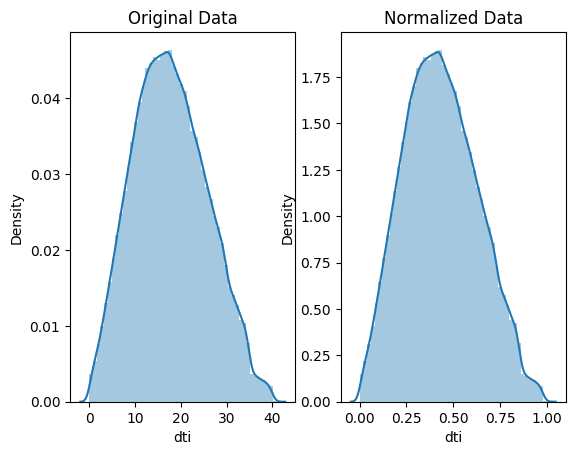

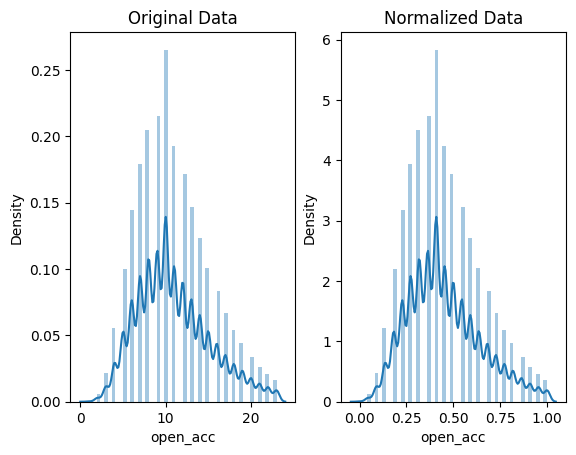

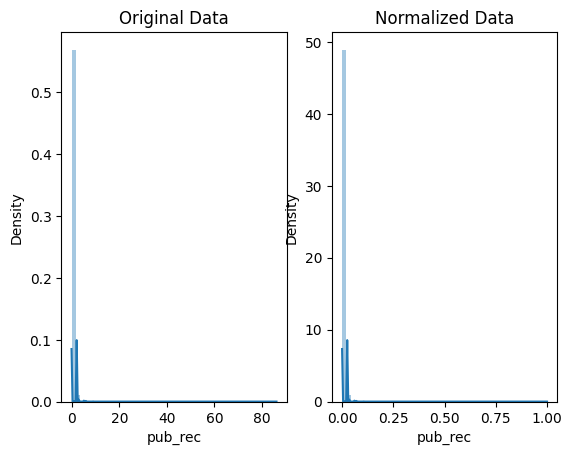

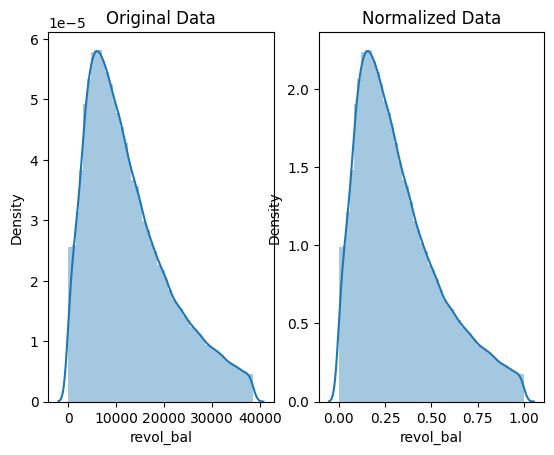

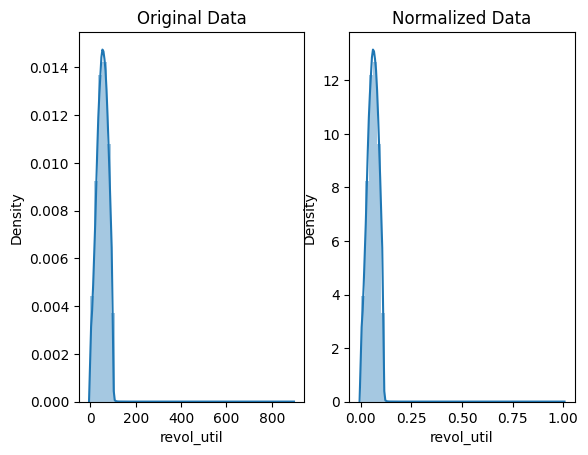

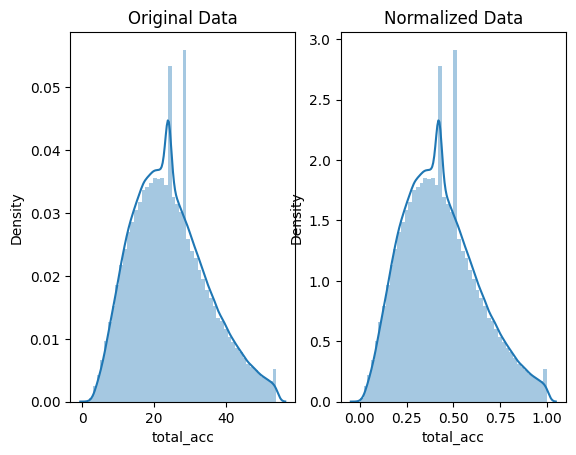

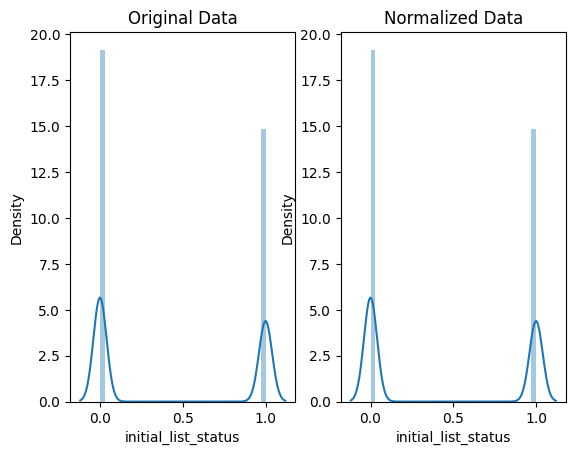

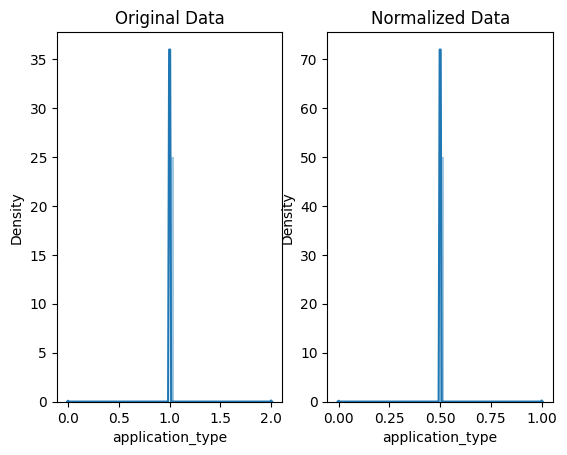

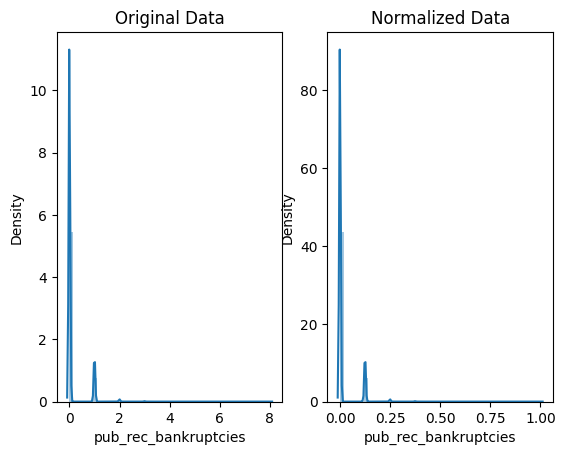

In [87]:

for i in x:
    fig,ax=plt.subplots(1,2)
    sns.distplot(x[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(norm_df[i],ax=ax[1])
    ax[1].set_title("Normalized Data")

In [88]:
x = norm_df

In [89]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**LOGISTIC REGRESSION**

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

Accuracy =  0.7993337381229795
Precision =  0.8097157042780385
Recall =  0.97868798553167
f1 score =  0.8862194100679258
              precision    recall  f1-score   support

           0       0.51      0.09      0.15     12279
           1       0.81      0.98      0.89     48658

    accuracy                           0.80     60937
   macro avg       0.66      0.53      0.52     60937
weighted avg       0.75      0.80      0.74     60937



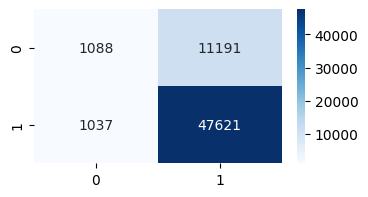

In [91]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

    
print(classification_report(y_test, y_pred))
#print(confusion_matrix)
cm = confusion_matrix(y_test, y_pred)
# Get class labels from the dataset

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

In [92]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred = model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.5336472747920586


## **DATA BALANCING METHODS**

**1. Ensembling**

In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a Decision Tree Classifier as base estimator
dt = DecisionTreeClassifier()

# Create a Bagging Classifier with Decision Trees as base estimator
bagging = BaggingClassifier(dt, n_estimators=10, max_samples=0.5, max_features=0.5)

# Train the model on the training data
bagging.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_bg = bagging.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred_bg))


              precision    recall  f1-score   support

           0       0.36      0.16      0.22     12279
           1       0.81      0.93      0.87     48658

    accuracy                           0.77     60937
   macro avg       0.59      0.54      0.54     60937
weighted avg       0.72      0.77      0.74     60937



In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_bg))
print('Precision = ',precision_score(y_test,y_pred_bg))
print('Recall = ',recall_score(y_test,y_pred_bg))
print('f1 score = ',f1_score(y_test,y_pred_bg))

Accuracy =  0.7739304527626893
Precision =  0.8137321916822564
Recall =  0.9296929590200995
f1 score =  0.8678561151079136


In [95]:
# class count
loan_status_count_0, loan_status_count_1 = data['loan_status'].value_counts()

# Separate class
loan_status_0 = data[data['loan_status'] == 0]
loan_status_1 = data[data['loan_status'] == 1]# print the shape of the class
print('loan_status 0:', loan_status_0.shape)
print('loan_status:', loan_status_1.shape)


loan_status 0: (61092, 19)
loan_status: (243593, 19)


**2.Near Miss**




In [96]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 194935
Before Undersampling, counts of label '0': 48813 

After Undersampling, the shape of train_X: (97626, 18)
After Undersampling, the shape of train_y: (97626,) 

After Undersampling, counts of label '1': 48813
After Undersampling, counts of label '0': 48813


**2.1 Random forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier
rndmclf=RandomForestClassifier(random_state=42)
model=rndmclf.fit(x_train_miss,y_train_miss)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.45207345291038287
[[ 9005  3274]
 [30115 18543]]


In [98]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

In [99]:
print(classification_report(y_test, y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.73      0.35     12279
           1       0.85      0.38      0.53     48658

    accuracy                           0.45     60937
   macro avg       0.54      0.56      0.44     60937
weighted avg       0.73      0.45      0.49     60937

Precision =  0.8499335380666453
Recall =  0.3810884130050557
f1 score =  0.5262291592763391


In [100]:
from sklearn.metrics import roc_auc_score
y_pred= model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.5572271611405276


In [101]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 9005  3274]
 [30115 18543]]


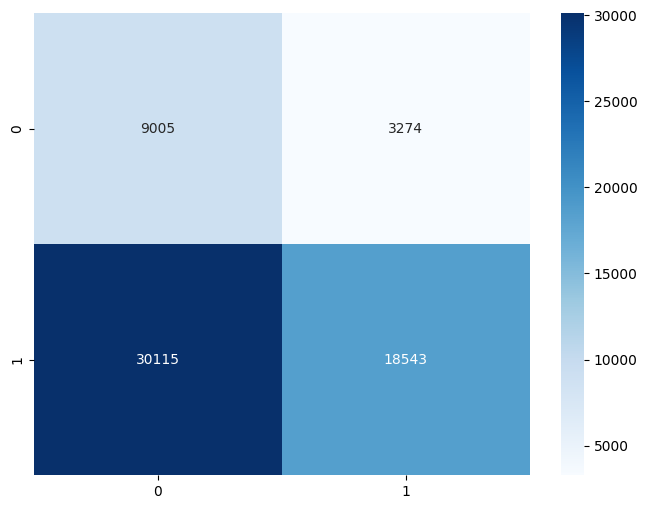

In [102]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax)
plt.show()

**2.2.Decision Tree**

In [103]:
from sklearn.tree import DecisionTreeClassifier
decclf=DecisionTreeClassifier(random_state=42)
model=decclf.fit(x_train_miss,y_train_miss)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.4537637231895236
[[ 8326  3953]
 [29333 19325]]


In [104]:
print(classification_report(y_test, y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.68      0.33     12279
           1       0.83      0.40      0.54     48658

    accuracy                           0.45     60937
   macro avg       0.53      0.54      0.44     60937
weighted avg       0.71      0.45      0.50     60937

Precision =  0.8301830054128362
Recall =  0.39715976817789467
f1 score =  0.5372831405693951


In [105]:
from sklearn.metrics import roc_auc_score
y_pred= model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.5376140073888903


In [106]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 8326  3953]
 [29333 19325]]


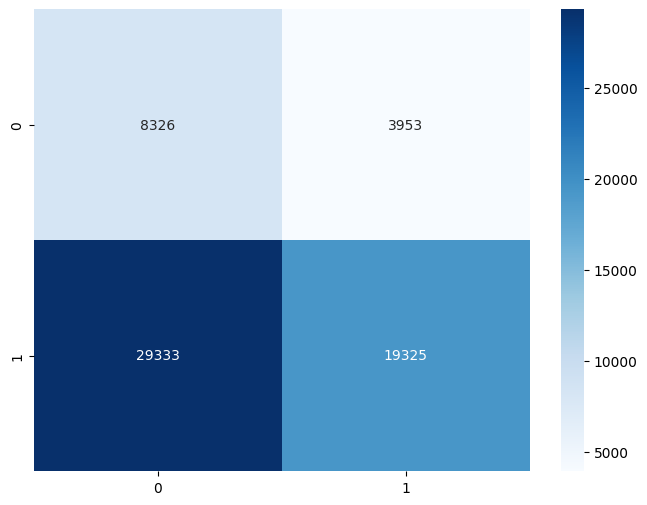

In [107]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

**2.3.logistic regression**

In [108]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train_miss,y_train_miss)
y_pred=model.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.5537522359157818
[[ 8267  4012]
 [23181 25477]]


In [109]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 8267  4012]
 [23181 25477]]


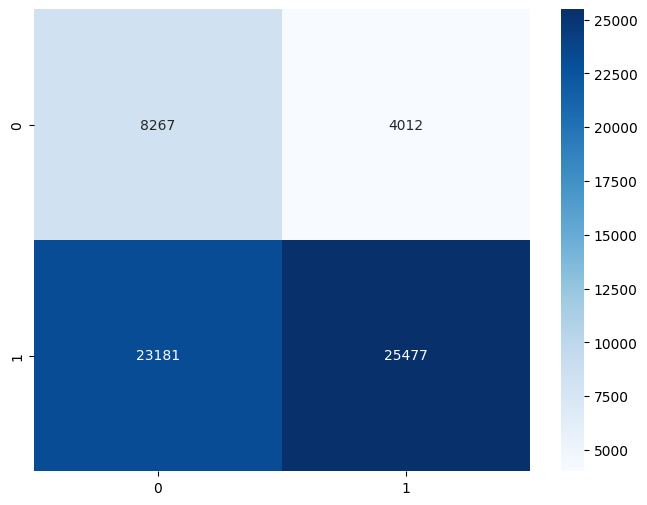

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

In [111]:
print(classification_report(y_test, y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.26      0.67      0.38     12279
           1       0.86      0.52      0.65     48658

    accuracy                           0.55     60937
   macro avg       0.56      0.60      0.52     60937
weighted avg       0.74      0.55      0.60     60937

Precision =  0.8639492692190308
Recall =  0.5235932426322496
f1 score =  0.652027589030929


In [112]:
from sklearn.metrics import roc_auc_score
y_pred= model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.5984282688444251


**3. SMOTE**

In [113]:
# importing SMOTE module from imblearn library  


print("Before Over Sampling, count of the label '1': {}".format(sum(y_train == 1)))  
print("Before Over Sampling, count of the label '0': {} \n".format(sum(y_train == 0)))  
from imblearn.over_sampling import SMOTE  
sm1 = SMOTE(random_state = 2)  
x_train_res, y_train_res = sm1.fit_resample(x_train, y_train.ravel())  
print('After Over Sampling, the shape of the train_X: {}'.format(x_train_res.shape))  
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_res.shape))  
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_res == 1)))  
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_res == 0)))

Before Over Sampling, count of the label '1': 194935
Before Over Sampling, count of the label '0': 48813 

After Over Sampling, the shape of the train_X: (389870, 18)
After Over Sampling, the shape of the train_y: (389870,) 

After Over Sampling, count of the label '1': 194935
After Over Sampling, count of the label '0': 194935


**3.1.Logistic Regression**

In [114]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train_res,y_train_res)
y_pred= model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
# Summary of the prediction

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.33      0.63      0.43     12279
           1       0.88      0.68      0.77     48658

    accuracy                           0.67     60937
   macro avg       0.61      0.65      0.60     60937
weighted avg       0.77      0.67      0.70     60937

Precision =  0.8788659793814433
Recall =  0.679785441242961
f1 score =  0.7666118154216978
Accuracy of the model is:  0.6694947240592743


In [115]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)


[[ 7720  4559]
 [15581 33077]]


In [116]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred= model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.6542505673516703


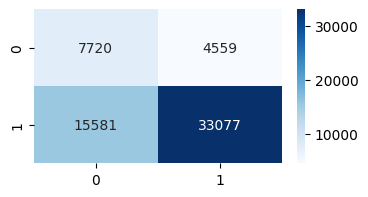

In [117]:
fig, ax = plt.subplots(figsize=(4,2))

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

**3.2.Random Forest**

In [118]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(x_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       0.45      0.21      0.29     12279
           1       0.82      0.93      0.88     48658

    accuracy                           0.79     60937
   macro avg       0.64      0.57      0.58     60937
weighted avg       0.75      0.79      0.76     60937

Precision =  0.8245868894134738
Recall =  0.9332483866990012
f1 score =  0.8755591547123246
Accuracy of the model is:  0.7881746722024385


In [119]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[ 2619  9660]
 [ 3248 45410]]


In [120]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred= model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.6542505673516703


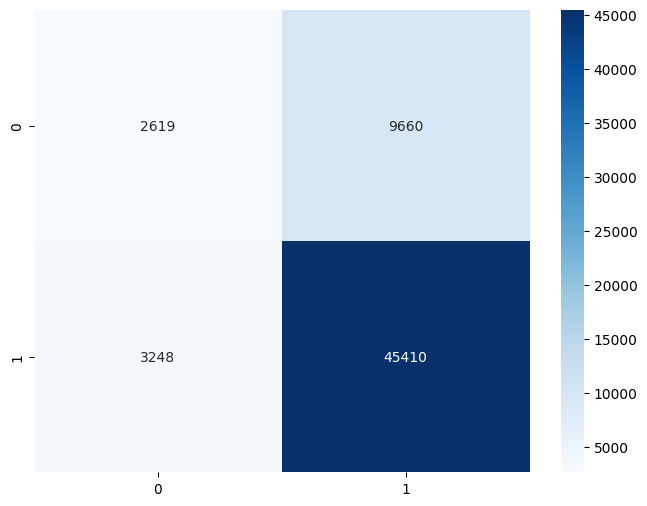

In [121]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

**3.3. Decision Tree**

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train_res, y_train_res)

# Make predictions on the testing set
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.28      0.32      0.30     12279
           1       0.82      0.80      0.81     48658

    accuracy                           0.70     60937
   macro avg       0.55      0.56      0.55     60937
weighted avg       0.71      0.70      0.71     60937

Precision =  0.8218273680635163
Recall =  0.7956142874758518
f1 score =  0.8085084165239548
Accuracy of the model is:  0.6990662487487077


In [123]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[ 3886  8393]
 [ 9945 38713]]


In [124]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred= model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.6542505673516703


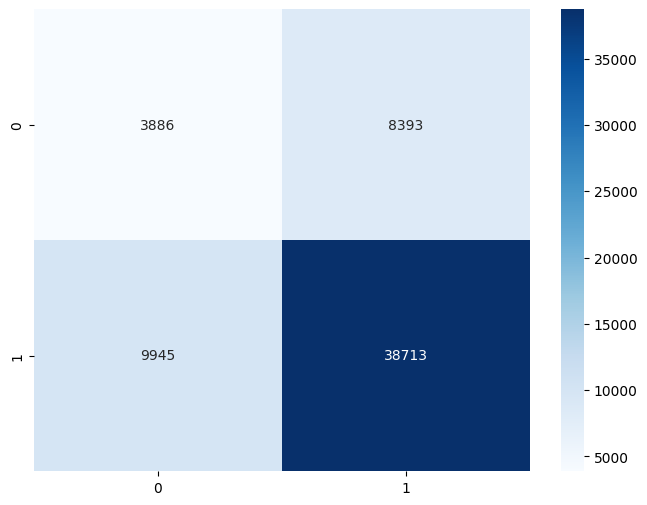

In [125]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

**4.COST-SENSITIVE LEARNING**

In [126]:
# Calculate weights using sklearn
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 2.4967529141826974, 1: 0.6252032728858338}

**4.1. Logistic Classifier With Weight Balancing**

Accuracy =  0.6694947240592743
Precision =  0.8788659793814433
Recall =  0.679785441242961
f1 score =  0.7666118154216978
              precision    recall  f1-score   support

           0       0.33      0.63      0.43     12279
           1       0.88      0.68      0.77     48658

    accuracy                           0.67     60937
   macro avg       0.61      0.65      0.60     60937
weighted avg       0.77      0.67      0.70     60937



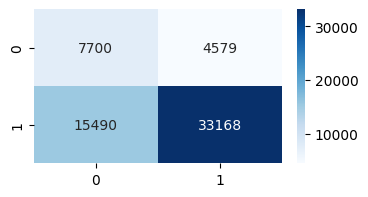

In [127]:
# Cost-sensitive learning
# Class_weight: Place more weight on minority class
# set class_weight to 'balance'

clf = LogisticRegression(class_weight='balanced').fit(x_train,y_train)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4,2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

In [128]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred_tf_w = model.predict(x_test)

print(roc_auc_score(y_test, y_pred_tf_w))

0.6542505673516703


**4.2. Decision Tree Classifier With Weight Balancing**

              precision    recall  f1-score   support

           0       0.29      0.29      0.29     12279
           1       0.82      0.82      0.82     48658

    accuracy                           0.71     60937
   macro avg       0.55      0.55      0.55     60937
weighted avg       0.71      0.71      0.71     60937



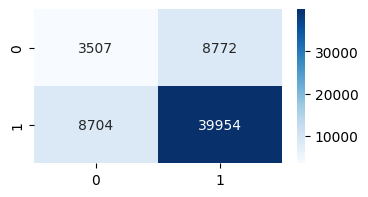

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# Define the misclassification costs

# Create and train the cost-sensitive decision tree
clf = DecisionTreeClassifier(class_weight=class_weights)
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

# Evaluate the model

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4,2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

In [130]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred = model.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.6542505673516703


**5.NEURAL NETWORK**

In [131]:
# Data processing
from collections import Counter
# Model and performance
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [132]:
n_inputs = len(x.columns)
n_inputs

18

**5.1.Baseline Neural Network Model**

In [133]:
# Train the neural network model using the imbalanced dataset
# Create model
model_nn = Sequential()
model_nn.add(Dense(11,input_dim=18,activation='relu'))
model_nn.add(Dense(9,activation='relu'))
model_nn.add(Dense(1,activation='sigmoid'))

In [134]:
# Compile model
model_nn.compile(loss='binary_crossentropy',optimizer='adam')
# Fit the model
model_nn.fit(x_train,y_train,epochs=5,batch_size=20)

Epoch 1/5
12188/12188 [==============================] - 44s 3ms/step - loss: 0.4606
Epoch 2/5
12188/12188 [==============================] - 40s 3ms/step - loss: 0.4554
Epoch 3/5
12188/12188 [==============================] - 41s 3ms/step - loss: 0.4546
Epoch 4/5
12188/12188 [==============================] - 40s 3ms/step - loss: 0.4543
Epoch 5/5
12188/12188 [==============================] - 39s 3ms/step - loss: 0.4535


1905/1905 [==============================] - 3s 1ms/step
Confusion Matrix: 



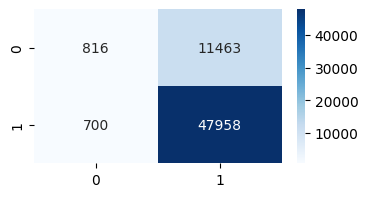

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.07      0.12     12279
           1       0.81      0.99      0.89     48658

    accuracy                           0.80     60937
   macro avg       0.67      0.53      0.50     60937
weighted avg       0.75      0.80      0.73     60937

ROC-AUC Score 0.5260343997415429


In [135]:
import keras
y_pred_nn = model_nn.predict(x_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
y_pred_classes = np.argmax(y_pred_nn, axis=1)  

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix: \n")
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()

report = classification_report(y_test, y_pred_nn)
print("Classification Report:")
print(report)
print("ROC-AUC Score",roc_auc_score(y_test, y_pred_nn))

**5.2.Neural Network With Class Weight Applied**

In [136]:
# Train the neural network model using the imbalanced dataset
# Create model
model_nn_balanced = Sequential()
model_nn_balanced.add(Dense(11,input_dim=18,activation='relu'))
model_nn.add(Dense(9,activation='relu'))
model_nn_balanced.add(Dense(1,activation='sigmoid'))

# Compile model
model_nn_balanced.compile(loss='binary_crossentropy',optimizer='adam')

# Fit the model
model_nn_balanced.fit(x_train,y_train, epochs=5, batch_size=32, class_weight=class_weights)

Epoch 1/5
7618/7618 [==============================] - 25s 3ms/step - loss: 0.6295
Epoch 2/5
7618/7618 [==============================] - 23s 3ms/step - loss: 0.6225
Epoch 3/5
7618/7618 [==============================] - 23s 3ms/step - loss: 0.6211
Epoch 4/5
7618/7618 [==============================] - 25s 3ms/step - loss: 0.6204
Epoch 5/5
7618/7618 [==============================] - 23s 3ms/step - loss: 0.6200


1905/1905 [==============================] - 3s 2ms/step
Confusion Matrix:


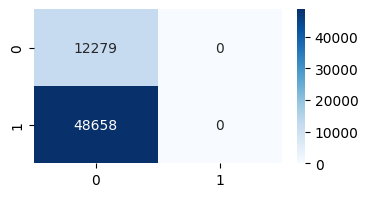

[[12279     0]
 [48658     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.64      0.44     12279
           1       0.88      0.68      0.77     48658

    accuracy                           0.67     60937
   macro avg       0.61      0.66      0.60     60937
weighted avg       0.77      0.67      0.70     60937

ROC-AUC Score 0.6561920923295059


In [137]:
# Make predictions on the test set
y_pred_nn_balanced = model_nn_balanced.predict(x_test)
y_pred_nn_balanced = (y_pred_nn_balanced > 0.5).astype(int)  # Convert probabilities to binary predictions
predicted_labels = np.argmax(y_pred_nn_balanced, axis=1)  # Convert predicted probabilities to class labels
# Assuming y_test is the true labels for your test data
#target_names = ['Fully Paid', 'Charged Off']  # Replace with your class names

# Generate the classification report
report = classification_report(y_test, y_pred_nn_balanced)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4,2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()
print(cm)

# Print the classification report
print("Classification Report:")
print(report)

# ROC AUC Score
print("ROC-AUC Score",roc_auc_score(y_test, y_pred_nn_balanced))

### **HYPERPARAMETER TUNING**

**1. HYPERPARAMETER TUNING ON NEURAL NETWORK**

In [138]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

# Define Keras model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=5, max_value=100, step=5), activation='relu', input_shape=(18,)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [140]:
# Create a tuner object
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=1, executions_per_trial=1, directory='my_dir', project_name='my_project')

# Perform hyperparameter search
tuner.search(x_train, y_train, validation_data=(x, y), epochs=5)

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_hyperparameters

In [141]:
best_model=tuner.hypermodel.build(best_hyperparameters)
# Train the model on the full training dataset
best_model.fit(x_train, y_train, epochs=5, batch_size=32, class_weight=class_weights)

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
7618/7618 [==============================] - 44s 6ms/step - loss: 0.6272 - accuracy: 0.6504
Epoch 2/5
7618/7618 [==============================] - 31s 4ms/step - loss: 0.6218 - accuracy: 0.6494
Epoch 3/5
7618/7618 [==============================] - 27s 4ms/step - loss: 0.6206 - accuracy: 0.6508
Epoch 4/5
7618/7618 [==============================] - 26s 3ms/step - loss: 0.6195 - accuracy: 0.6508
Epoch 5/5
1905/1905 [==============================] - 7s 4ms/step - loss: 0.6116 - accuracy: 0.6667
Test Loss: 0.6116416454315186
Test Accuracy: 0.6667049527168274


1905/1905 [==============================] - 3s 2ms/step
Confusion Matrix:
[[12279     0]
 [48658     0]]


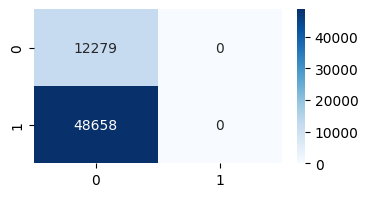

Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.34     12279
           1       0.00      0.00      0.00     48658

    accuracy                           0.20     60937
   macro avg       0.10      0.50      0.17     60937
weighted avg       0.04      0.20      0.07     60937

ROC-AUC Score 0.6575269616756434


In [142]:
# Make predictions on the test dataset
y_pred_nn_tuned = best_model.predict(x_test)
y_pred_nn_tuned = (y_pred_nn_tuned > 0.5).astype(int)
y_pred_classes = np.argmax(y_pred_nn_tuned, axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
print(cm)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4,2))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.show()


# Print the classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

print("ROC-AUC Score",roc_auc_score(y_test, y_pred_nn_tuned))

#### 2. HYPERPARAMETER TUNING ON NEAR MISS RANDOM FOREST

In [143]:
from sklearn.ensemble import RandomForestClassifier
n_estimators =[int(x) for x in np.linspace(start =10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth = [2,4]
min_samples_split=[2,5]
min_samples_leaf = [1,2]
bootstrap = [True,False]

In [144]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap': bootstrap
}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [145]:
rf_classifier = RandomForestClassifier()

In [146]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_classifier,param_distributions=param_grid, cv=10 ,verbose=2, n_jobs = 4)
rf_RandomGrid.fit(x_train_miss,y_train_miss)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [147]:
rf_RandomGrid.best_params_

{'n_estimators': 72,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [148]:
y_pred= rf_RandomGrid.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.25      0.37     32661
           1       0.50      0.86      0.63     28276

    accuracy                           0.54     60937
   macro avg       0.59      0.56      0.50     60937
weighted avg       0.59      0.54      0.49     60937



In [149]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred= rf_RandomGrid.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.5883605197142247


#### 3.HYPERPARAMETER TUNING ON SMOTE RANDOM FOREST

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [151]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_classifier,param_distributions=param_grid, cv=10 ,verbose=2, n_jobs = 4)
rf_RandomGrid.fit(x_train_res,y_train_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [152]:
rf_RandomGrid.best_params_

{'n_estimators': 17,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [153]:
y_pred_grid = rf_RandomGrid.predict(x_test)

print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.63      0.31      0.41     25208
           1       0.64      0.87      0.74     35729

    accuracy                           0.64     60937
   macro avg       0.64      0.59      0.58     60937
weighted avg       0.64      0.64      0.60     60937



In [154]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred= rf_RandomGrid.predict(x_test)

print(roc_auc_score(y_test, y_pred))

0.6357765179867585


Random Forest Smote after hyperparameter tuning is found to have the highest F1-score (0.41) and high ROC AUC score and so we select the same to build the application to identify risky loan applicants 